
<h1><strong><center>UCCD2063 Artificial Intelligence Techniques</center> </strong></h1>

<h1><center>Classification of Adult Income by Machine Learning</center></h1>
<hr>
<h2><strong><center>The contributors:</center></strong></h2>
<h3>
<center>Tan Jing Jie 1804560</center>
<center>Lew Wei Li 1803518</center>
<center>Pamela Yong Zi Wei 1803580</center>
</h3>
<hr>







# Introduction
The `adult` dataset is extracted by Barry Becker from the 1994 Census database. This dataset is also known as the Census income dataset. 

__Goal__: Predict whether a person makes over 50k a year if given attributes about that person.

Source of `adult` dataset: https://archive.ics.uci.edu/ml/datasets/Adult

__Agenda__
1. [Data Collection and Exploration](#1.0-Data-Collection-and-Exploration)
2. [Data Preprocessing](#2.0-Data-Preprocessing)
3. [Model Classification](#3.0-Model-Classification)
4. [Comparison of Classifiers](#4.0-Comparison-of-Classifiers)
5. [Fine-Tune Model](#5.0-Fine-Tune-Model)
6. [Predict](#6.0-Predict)
7. [The conclusion](#7.0-The-conclusion)
<hr>

<h1><strong>Dataset Background</strong></h1>
Extraction of the dataset was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions:
<ul>
<li>The age is more than 16</li>
<li>The adjusted gross income more than 100</li>
<li>The hours worked per week more than zero</li>
</ul>
<hr>

<h1><strong>Dataset Attribute Information</strong></h1>
<ol>
<li>Age</li>
<li>Workclass: The type of class that the job falls under (e.g Private, Local-gov, Never work)</li>
<li>Education: The highest education level (e.g Bachelor)</li>
<li>education_num: Is acontinuous number that represent number of years of educaton</li>
<li>Marital_status: (e.g Married-civ-spouse, Divorced)</li>
<li>Occupation: (e.g Tech-support, Craft-repair)</li>
<li>Relationship: the family (e.g. Wife, Own-child)</li>
<li>Race: (e.g White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)</li>
<li>Sex: Male or female</li>
<li>Capital-gain: A continuous number that respond a unit's income from investment sources (not including salary)</li>
<li>Capital-loss: A continuous number that respond a unit's losses from investment sources (not including salary)</li>
<li>Hours-per-week: A continuous number as the number of hours worked per week</li>
<li>Native-country: Country name</li>
<li>fnlwgt (final weight): the number of units in the target population that the responding unit represents</li>
    <h2> The attribute to predict: </h2>
<li>Income: whether >50k or <=50k </li>

</ol>

<hr>

# Import Library Files
First, we import the required libraries.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix


---
# 1.0 Data Collection and Exploration

## 1.1 Load the dataset

We load the data into pandas dataframe using the `read_csv` function.
The dataset is the csv file `adult.csv` located at directory `.\datasets`.
We use separator ` *, *` to trim all the whitespaces before and after the data values. The missing values in the dataset are indicated by `?`. In the `adult_test.csv`, we also removed the extra `.` behind the income data.

In [2]:
colname = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

df1 = pd.read_csv('./datasets/adult.csv', names = colname, sep = ' *, *', engine = 'python', na_values = '?')
df2 = pd.read_csv('./datasets/adult_test.csv', names = colname, sep = ' *, *', engine = 'python', na_values = '?')

df2['income'].replace(regex = True, inplace = True, to_replace = r'\.', value = r'')

adult = pd.concat([df2,df1])
adult.reset_index(inplace = True, drop = True)

## 1.2 Explore the dataset

See the distribution of income. About 1/5 is rich

In [3]:
adult['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

To show first 5 items of DataFrame adult.
The missing value denoted by 'NaN'

In [4]:
print("Shape of Adult Dataset:", adult.shape,"\n")
adult.head()

Shape of Adult Dataset: (48842, 15) 



age  workclass  fnlwgt     education  education_num      marital_status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital_gain  capital_loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours_per_week native_country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

__Observations__
1. There are 6 numerical and 9 categorical attributes.
2. There are a total of 15 columns in the dataset where 14 columns are input features and 1 column `income` is the targeted variable.

Some of the variables are not self-explanatory. The continuos variable `fnlwgt` represents final weight, is the number of units in the target population that the responding unit represents. 
The variable `education_num` represents the number of years of education in total, which is a continuous representaion of `education`. The variable relationship represents the unit's role in the family. `capital_gain` and `capital_loss` are income from investment other than salary.

For simplicity of this analysis, the weighting factor is discarded. The highest education level completed can be represented by the total number of years in education. And the realtionship can be assessed from sex and marital status. Hence the column `fnlwgt`, `education` and `relationship` are dropped. 

Next, a quick description of all attributes in adult is shown.

In [5]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


__Observations__
1. There are a total of 48842 samples in the dataset.
2. 5.6+ MB memory is required to load the dataset.
3. There are 6 numerical and 9 non-numerical attributes in the dataset.

In [3]:
adult.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

**Observation:** The attributes `workclass`, `occupation` and `native_country` have missing values. There is a total of 6465 missing values in the datasets.

To show the statistics of all numerical attributes in the DataFrame `adult`.

In [7]:
adult.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

__Observations:__

**For age :**
1. The mean value is 38 i.e. on an average the value of age attribute is 38.
2. The value of Age attribute varies from 17 to 90.
3. The 1st quartile is 28 i.e. 25% of the observations lies below 28.
4. 3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
5. The difference between 3rd quartile & maximum made the distribution right skewed.

**For capital_gain :**
1. The mean is 1079.06 and median is 0. Since mean is greater than median, this indicates that the distribution is highly right skewed.
2. From the quartiles it is clearly visible that 75% observations are having 0 in capital gain.
capital_gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation.
3. capital_gain shows that either a person has no gain or has gain of very large amount (10k or 99k).

**For capital_loss :**
1. This attribute is similar to the capital_gain.
2. The distribution is rightly skewed.

**For hours_per_week :**
1. Hours per week atrribute varies within the range of 1 to 99.
2. 75% people spent 45 or less working hours per week.
3. The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
4. The observations based on quartiles conclude that the distribution is approximately symmetric.
5. Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are quite rare.

**Outliers detection**

In [8]:
def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [9]:
tukey_indices, tukey_values = find_outliers_tukey(adult['age'])
print('age outliers:\n',np.sort(tukey_values))
print()

tukey_indices, tukey_values = find_outliers_tukey(adult['capital_gain'])
print('capital gain outliers:\n',np.sort(tukey_values))
print()

tukey_indices, tukey_values = find_outliers_tukey(adult['capital_loss'])
print('capital loss outliers:\n',np.sort(tukey_values))
print()

tukey_indices, tukey_values = find_outliers_tukey(adult['hours_per_week'])
print('hours per week outliers:\n',np.sort(tukey_values))

age outliers:
 [79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79
 79 79 79 79 79 79 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80
 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 81 81 81 81
 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81
 81 81 81 81 81 81 81 81 81 82 82 82 82 82 82 82 82 82 82 82 82 82 82 82
 83 83 83 83 83 83 83 83 83 83 83 84 84 84 84 84 84 84 84 84 84 84 84 84
 85 85 85 85 85 86 87 87 87 88 88 88 88 88 88 89 89 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90]

capital gain outliers:
 [  114   114   114 ... 99999 99999 99999]

capital loss outliers:
 [ 155  213  213 ... 4356 4356 4356]

hours per week outliers:
 [ 1  1  1 ... 99 99 99]


**Observations:**
1. `age` is having outliers starting from 79 to 90. We will further determine whether these values are outliers or not when analysing with other attributes during data visualization.
2. `capital_gain` is having outliers 114 and 99999.
3. `capital_loss` is having outliers 115, 213 and 2356.
4. `hours_per_week` is having outliers 1 and 99. Working for 99 hours per week is rare, if people work for both weekdays and weekends, they would have to work for an average of 14 hours or more everyday, we will analyse it together with `age`. If people only work on weekdays, it means that they have to work for 20 hours a day which is not logical.

## 1.3 Duplicates value check (rows).

In [10]:
all_duplicates = adult[adult.duplicated(keep=False)].sort_values(['age'])
repeated = adult[adult.duplicated(keep='first')]
print("There are repeated rows:",repeated.shape[0])
all_duplicates

There are repeated rows: 52


age         workclass  fnlwgt     education  education_num  \
40948   17           Private  153021          12th              8   
4152    17           Private  153021          12th              8   
3900    18      Self-emp-inc  378036          12th              8   
15960   18      Self-emp-inc  378036          12th              8   
26375   19               NaN  167428  Some-college             10   
...    ...               ...     ...           ...            ...   
23334   49  Self-emp-not-inc   43479  Some-college             10   
38156   49           Private   31267       7th-8th              4   
24201   49           Private   31267       7th-8th              4   
21385   90           Private   52386  Some-college             10   
18584   90           Private   52386  Some-college             10   

           marital_status       occupation   relationship                race  \
40948       Never-married            Sales      Own-child               White   
4152        Never-married            Sales      Own-child               White   
3900        Never-married  Farming-fishing      Own-child               White   
15960       Never-married  Farming-fishing      Own-child               White   
26375       Never-married              NaN      Own-child               White   
...                   ...              ...            ...                 ...   
23334  Married-civ-spouse     Craft-repair        Husband               White   
38156  Married-civ-spouse     Craft-repair        Husband               White   
24201  Married-civ-spouse     Craft-repair        Husband               White   
21385       Never-married    Other-service  Not-in-family  Asian-Pac-Islander   
18584       Never-married    Other-service  Not-in-family  Asian-Pac-Islander   

          sex  capital_gain  capital_loss  hours_per_week native_country  \
40948  Female             0             0              20  United-States   
4152   Female             0             0              20  United-States   
3900     Male             0             0              10  United-States   
15960    Male             0             0              10  United-States   
26375    Male             0             0              40  United-States   
...       ...           ...           ...             ...            ...   
23334    Male             0             0              40  United-States   
38156    Male             0             0              40  United-States   
24201    Male             0             0              40  United-States   
21385    Male             0             0              35  United-States   
18584    Male             0             0              35  United-States   

      income  
40948  <=50K  
4152   <=50K  
3900   <=50K  
15960  <=50K  
26375  <=50K  
...      ...  
23334  <=50K  
38156  <=50K  
24201  <=50K  
21385  <=50K  
18584  <=50K  

[101 rows x 15 columns]

## 1.4 Data Visualization

### 1.4.1 Numerical Attributes

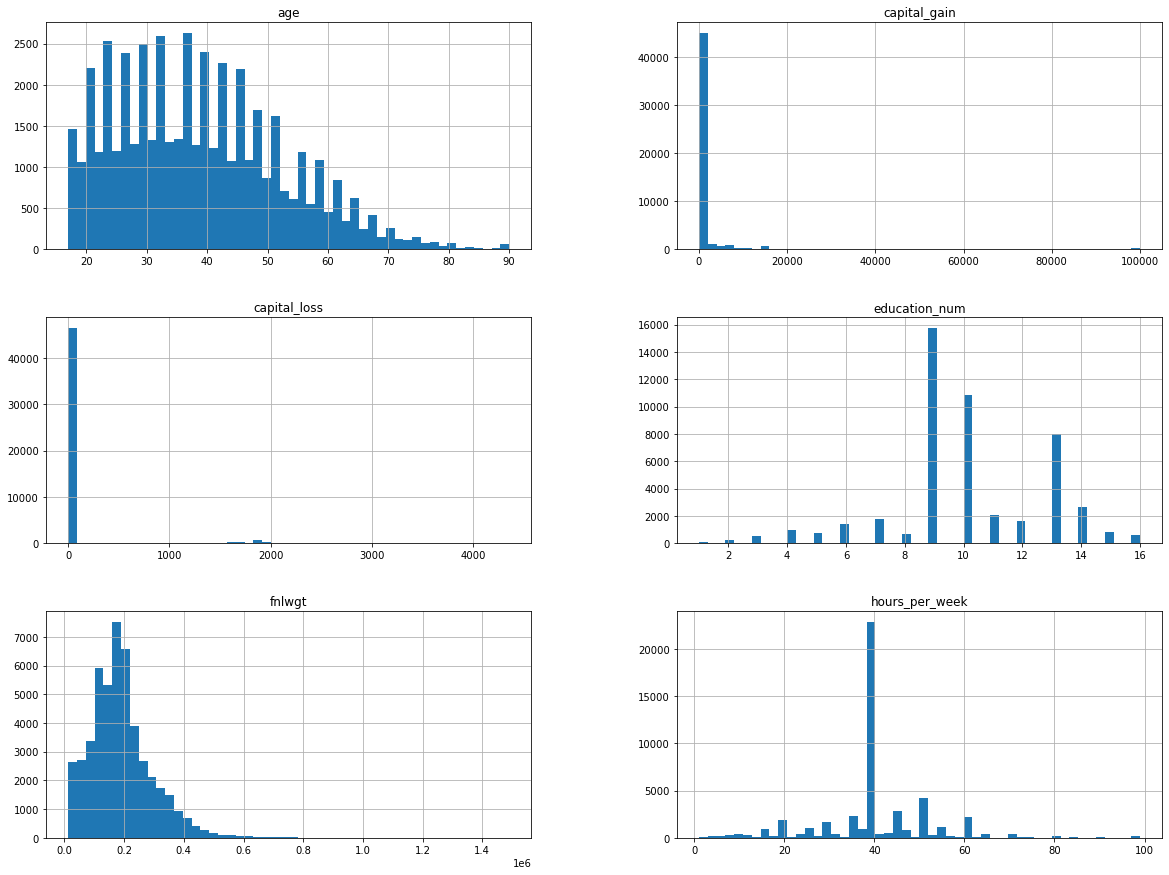

In [11]:
adult.hist(bins = 50, figsize = (20,15))
plt.show()

Observations:
1. The attributes `age` and `fnlwgt` are rightly skewed.
2. The attributes `capital_gain` and `capital_loss` are also rightly skewed because individual either has no gain/loss or gain/loss in a large amount. 

To show correlations between numerical attributes.

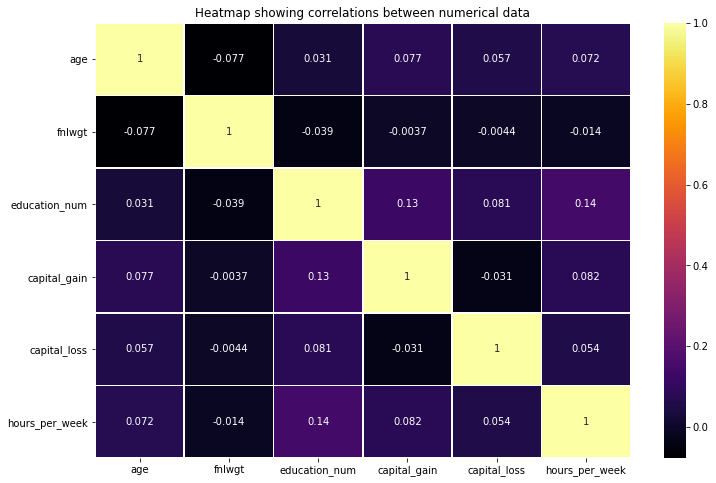

In [12]:
plt.figure(figsize=(12,8))  
sns.heatmap(adult.corr(),annot=True,linewidths=.5, cmap="inferno")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

**Observations:**
1. There is no strong correlation among the numerical attributes.
2. There is neither strong positive nor strong negative correlation present in any variable.
3. The strongest correlation is 0.082 which is the correlation between capital_gain and hours_per_week.(less than 0.1, it indicates that there is only very small correlation among them).

### 1.4.2 Categorical Attributes vs Income

#### Workclass vs Income

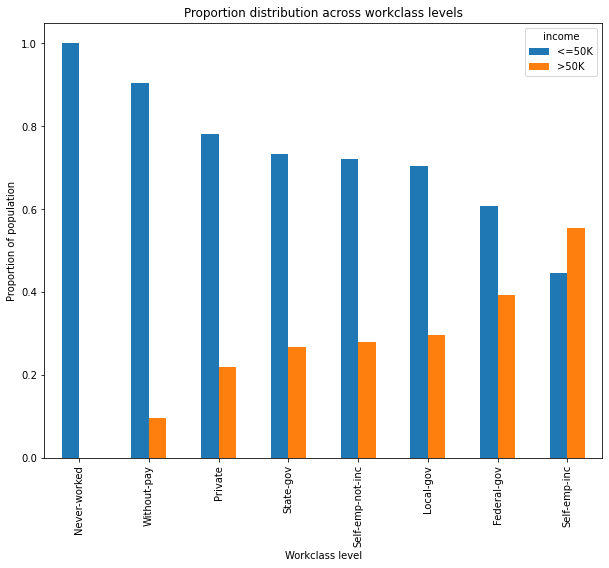

In [13]:
workclass = pd.crosstab(adult.workclass, adult.income).div(pd.crosstab(adult.workclass, adult.income).apply(sum,1),0)

workclass.sort_values(by = '>50K', inplace = True)

ax = workclass.plot(kind = 'bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

print()

**Observation:**
- People who never worked did not earn >50k. This indicates that there is no abnormal data in this attribute.
- Only Self-emp-inc workclass is having more people earning >50k.

#### Occupation vs Income

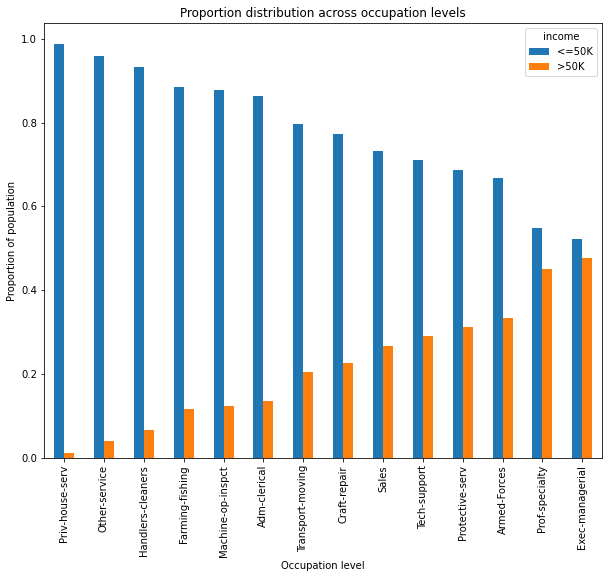

In [14]:
occupation = pd.crosstab(adult.occupation, adult.income).div(pd.crosstab(adult.occupation, adult.income).apply(sum,1),0)

occupation.sort_values(by = '>50K', inplace = True)

ax = occupation.plot(kind = 'bar', title = 'Proportion distribution across occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

print()

**Observation:**
- In every occupation, people who earn <=50k is greater than >50k.

#### Hours per week vs Income

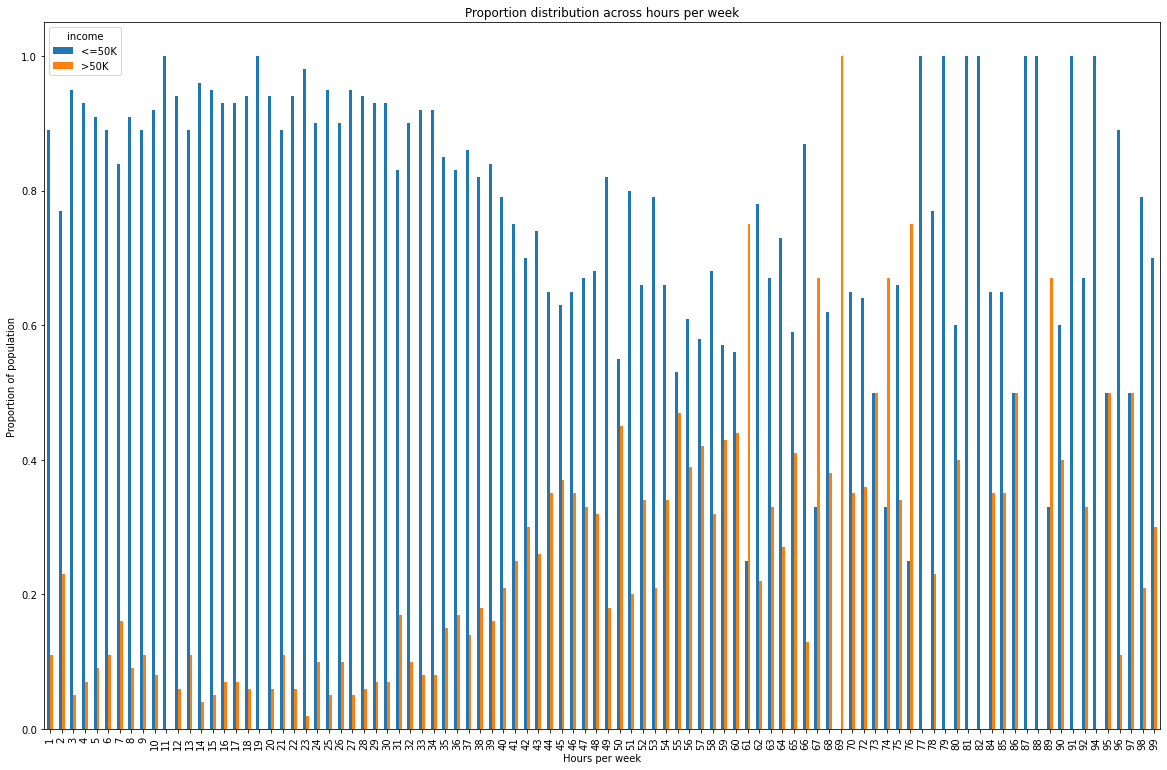

In [15]:
hours_per_week = round(pd.crosstab(adult['hours_per_week'], adult.income).div(pd.crosstab(adult['hours_per_week'], adult.income).apply(sum,1),0),2)

#hours_per_week.sort_values(by = '>50K', inplace = True)

ax = hours_per_week.plot(kind = 'bar', title = 'Proportion distribution across hours per week', figsize = (20,13))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

print()

**Observations:**

The trend in the beginning of the graph is as expected, the higher the hours worked per week, the higher the proportion of pupulation making more than 50k a year. However this wasn't really true, as we observe from the graph, after 69 hours worked per week, the population earning more than 50k a year starts to drop. And there were couple instances such as 77,79 and more where no one earned more than 50k a year.

#### Education vs Income

In [16]:
# Create a dictionary which consists of education and education level
edu_dict = {}
for x,y in adult[['education_num','education']].drop_duplicates().itertuples(index=False):
    edu_dict[y] = x

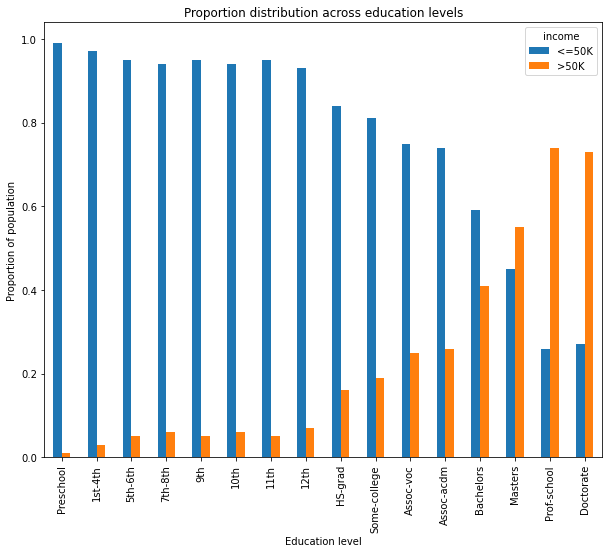

In [17]:
education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_dict, key = edu_dict.get, reverse = False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

print()

**Observations:**
- For Masters, Prof-school and Doctorate, people who earn >50k is greater than <=50k. 
- We can also infer that higher education may provide better earning abilities.

#### Sex vs Income

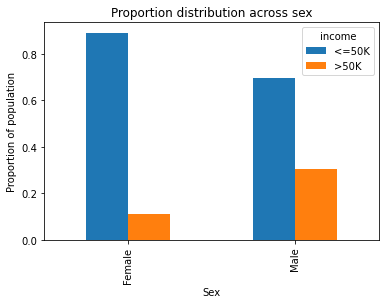

In [18]:
sex = pd.crosstab(adult.sex, adult.income).div(pd.crosstab(adult.sex, adult.income).apply(sum,1),0)
sex.sort_values(by = '>50K', inplace = True)
ax = sex.plot(kind ='bar', title = 'Proportion distribution across sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Proportion of population')

print()

**Observation:**
- In general, male earns more than female.

#### Race vs Income

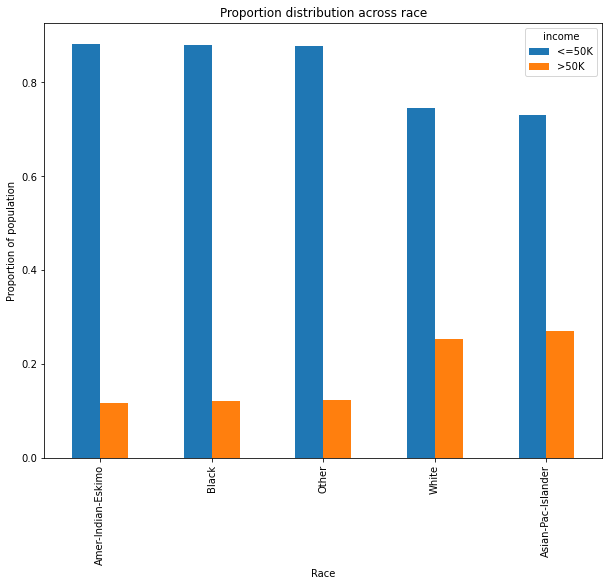

In [19]:
race = pd.crosstab(adult.race, adult.income).div(pd.crosstab(adult.race, adult.income).apply(sum,1),0)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race', figsize = (10,8))
ax.set_xlabel('Race')
ax.set_ylabel('Proportion of population')
print()

**Observation:**
- Among all the races, White and Asian-Pac-Islander are more likely to earn >50k compared to all the other races.

#### Native Country vs Income

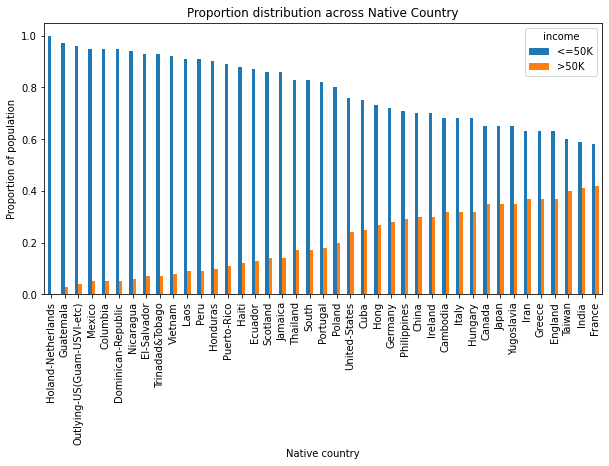

In [20]:
native_country = round(pd.crosstab(adult['native_country'], adult.income).div(pd.crosstab(adult['native_country'], adult.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country', figsize = (10,5))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')
print()

**Observation:**
- Not dependency of `native_country` on target attribute `income`.

## 1.5 Outliers Visualization

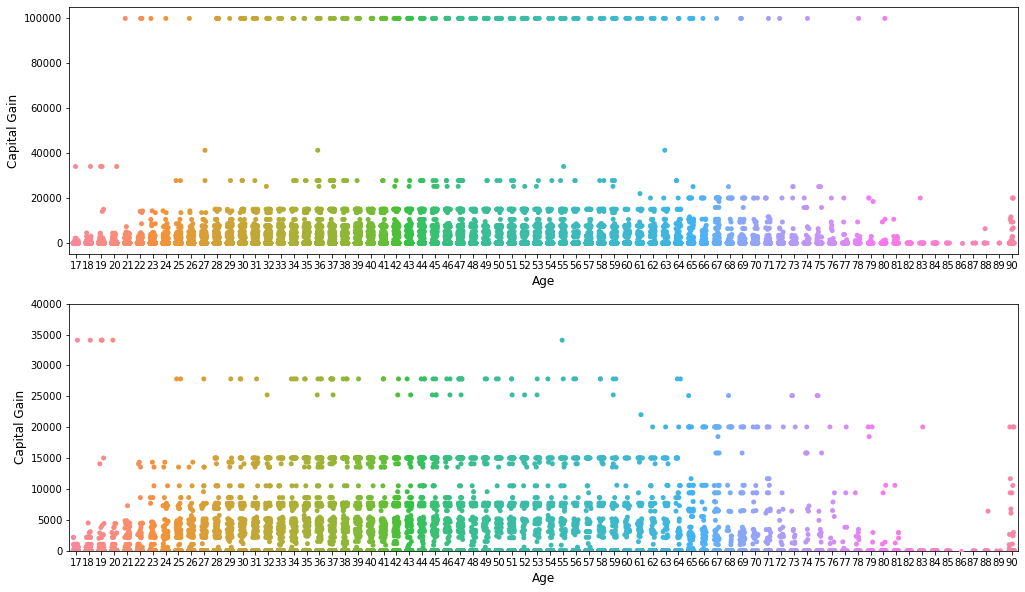

In [21]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital_gain', data = adult, jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital_gain', data = adult,jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

**Observations:**
<br>
Diagram 1:
1. Capital gain of 99999 is clearly an outlier.

Diagram 2:
1. Majority of people between the age of 28 and 64 are earning a maximum capital gain of 15k. After that it decreases until a sudden increase at the age of 90.
2. Minority of people between the age of 28 and 59 are earning more than 25k. After that it decreases until a sudden increase at the age of 90 again.
3. Age 90 doesn't follow the pattern.

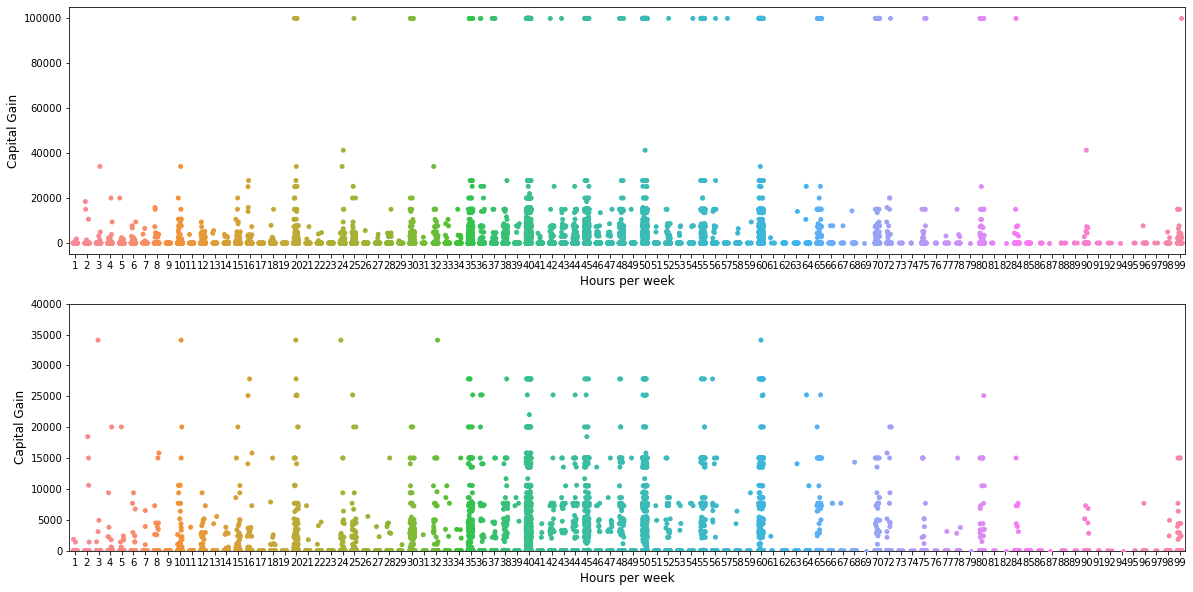

In [22]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours_per_week', 'capital_gain', data = adult,jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours_per_week', 'capital_gain', data = adult,jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

**Observations:**
<br>
Diagram 1:
1. Capital gain of 99999 is clearly an outlier.

Diagram 2:
1. Majority of people can be seen working for 40,50 and 60 hours per week.
2. The capital gain is increasing when hours per week increases but started to decrease after 60 hours per week.
3. There are a few people working for 99 hours per week but their capital gain is less than those people working for only 40 hours. Therefore, we infer 99 hours per week is an outlier.

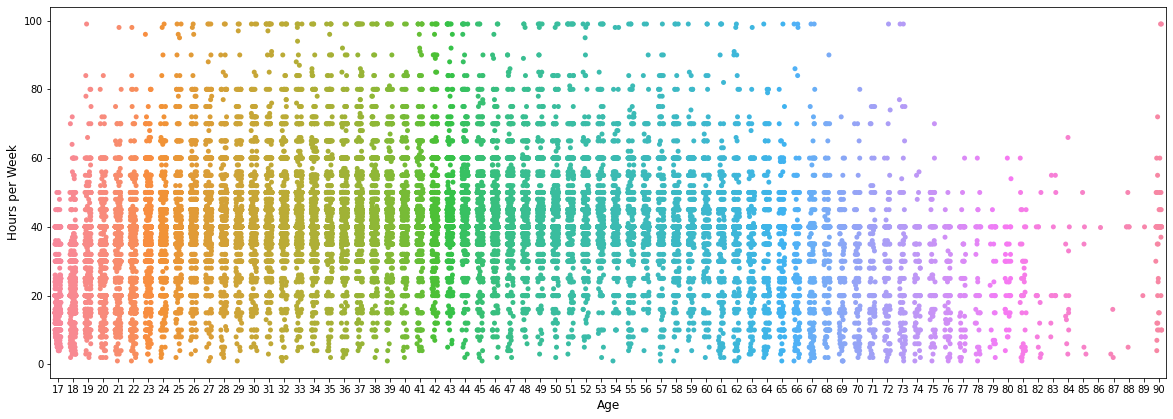

In [23]:
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'hours_per_week', data = adult,jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Hours per Week',fontsize = 12);

From this diagram, we can infer that people who are 90 years old is an outlier as it does not follow the general pattern.

**Further Actions:**
1. Repeated values removal
<br><br>
2. Features removal:
- `education` and `education_num` basically mean the same thing, so we only keep either one. In this case, `education` will be removed.
- `fnlwgt`
- `relationship` and `marital_status` contain similar information, so we only keep either one. In this case, `relationship` will be removed.
<br><br>
3. Outliers removal:
- Capital gain of 99999.
- People who are 90 years old.
- People who are working 99 hours per week.

# 2.0 Data Preprocessing

## 2.1 Drop repeated values (duplicate rows)

In [24]:
print("Shape before drop:", adult.shape)
adult = adult.drop_duplicates(keep = 'first')
print("Shape after drop:", adult.shape)

Shape before drop: (48842, 15)
Shape after drop: (48790, 15)


## 2.2 Drop outliers

In [25]:
# drop capital gain of 99999
print("Shape before dropping capital gain of 99999:", adult.shape)
adult = adult.drop(adult[adult['capital_gain']==99999].index)
print("Shape after dropping capital gain of 99999:", adult.shape)

# drop age of 90
print("Shape before dropping age of 90:", adult.shape)
adult = adult[adult['age'] < 90]
print("Shape after dropping age of 90:", adult.shape)

# drop 99 hours per week
print("Shape before dropping 99 hours per week:", adult.shape)
adult = adult[adult['hours_per_week'] < 99]
print("Shape after dropping 99 hours per week:", adult.shape)

Shape before dropping capital gain of 99999: (48790, 15)
Shape after dropping capital gain of 99999: (48546, 15)
Shape before dropping age of 90: (48546, 15)
Shape after dropping age of 90: (48492, 15)
Shape before dropping 99 hours per week: (48492, 15)
Shape after dropping 99 hours per week: (48358, 15)


## 2.3 Dealing with missing values

In [26]:
# change null to a value to do classification on the missing values and won't miss out some columns
adult.fillna('?', inplace = True)

Fill the missing values in the 3 columns by predicting their values. For each column use all other attributes as variables and treat the column as targeted variable, and has a multi-class classification task.

In [27]:
# change 'object' to 'category' type, using 'object' type will cause some of the columns will not be encoded
for col in set(adult.columns) - set(adult.describe().columns):
    adult[col] = adult[col].astype('category')

#### 2.3.1 Fill missing values for Workclass column

In [28]:
# extract the rows with no missing values
sample_data = adult[(adult.workclass.values != '?')].copy()
#get the targeted variable
sample_label = sample_data.workclass

# extract the rows with missing values
missing_data = adult[(adult.workclass.values == '?')].copy()

# drop workclass
sample_data.drop(columns = ['workclass'], inplace = True)
missing_data.drop(columns = ['workclass'], inplace = True)

# extract the categorical columns
sample_cat_col = sample_data.select_dtypes('category').columns
missing_cat_col = missing_data.select_dtypes('category').columns

# encode the categorical columns
# not using LabelBinarizer because it does not allow multiple outputs and need do 1 by 1
df_1 = sample_data.drop(columns = sample_cat_col,axis = 1)
df_2 = pd.get_dummies(sample_data[sample_cat_col])
sample_data_tr = pd.concat([df_1, df_2], axis=1, join='inner')

df_1 = missing_data.drop(columns = missing_cat_col,axis = 1)
df_2 = pd.get_dummies(missing_data[missing_cat_col])
missing_data_tr = pd.concat([df_1, df_2], axis=1, join='inner')

# do the classification by tree and random forest algorithm
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(sample_data_tr, sample_label)
tree_pred = tree_clf.predict(missing_data_tr)

forest_clf = RandomForestClassifier(n_estimators=10,random_state=42 )
forest_clf.fit(sample_data_tr, sample_label)
forest_pred = forest_clf.predict(missing_data_tr)

# the most value in the class
most_val = adult.workclass.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': forest_pred, 'DTree' : tree_pred})

# to choose the best value for workclass
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else most_val, axis = 1)

# insert the value into the column with '?' as missing value 
adult.loc[(adult.workclass.values == '?'),'workclass'] = overall_pred.values
print(adult.workclass.value_counts())

Private             35443
Self-emp-not-inc     3794
Local-gov            3126
State-gov            1974
Self-emp-inc         1620
Federal-gov          1429
Never-worked          951
Without-pay            21
?                       0
Name: workclass, dtype: int64


#### 2.3.2 Fill missing values for Occupation column

In [29]:
#extract the row with no missing value
sample_data = adult[(adult.occupation.values != '?')].copy()
#get the targeted variable
sample_label = sample_data.occupation

#extract the row with missing value
missing_data = adult[(adult.occupation.values == '?')].copy()

#drop the targeted variable columns for both missing and not missing rows
sample_data.drop(columns = ['occupation'], inplace = True)
missing_data.drop(columns = ['occupation'], inplace = True)

#get the categorical column 
sample_cat_col = sample_data.select_dtypes('category').columns
missing_cat_col = missing_data.select_dtypes('category').columns
#encode the categorical column
df_1 = sample_data.drop(columns = sample_cat_col,axis = 1)
df_2 = pd.get_dummies(sample_data[sample_cat_col])
sample_data_tr = pd.concat([df_1, df_2], axis=1, join='inner')
#endcode
df_1 = missing_data.drop(columns = missing_cat_col,axis = 1)
df_2 = pd.get_dummies(missing_data[missing_cat_col])
missing_data_tr = pd.concat([df_1, df_2], axis=1, join='inner')

#do the classification by tree and random forrest algorithmn
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(sample_data_tr, sample_label)
tree_pred = tree_clf.predict(missing_data_tr)

forest_clf = RandomForestClassifier(n_estimators=10,random_state=42 )
forest_clf.fit(sample_data_tr, sample_label)
forest_pred = forest_clf.predict(missing_data_tr)

#the most value in the class
most_val = adult.occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': forest_pred, 'DTree' : tree_pred})
#to choose the best value for workclass occupaation
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else most_val, axis = 1)

adult.loc[(adult.occupation.values == '?'),'occupation'] = overall_pred.values
print(adult.occupation.value_counts())

Craft-repair         7964
Prof-specialty       6121
Exec-managerial      6055
Adm-clerical         5889
Sales                5528
Other-service        5079
Machine-op-inspct    3066
Transport-moving     2381
Handlers-cleaners    2096
Farming-fishing      1487
Tech-support         1451
Protective-serv       979
Priv-house-serv       247
Armed-Forces           15
?                       0
Name: occupation, dtype: int64


#### 2.3.3 Fill missing values for Native Country column

In [30]:
#extract the row with no missing value
sample_data = adult[(adult['native_country'].values != '?')].copy()
#get the targeted variable
sample_label = sample_data['native_country']

#extract the row with missing value
missing_data = adult[(adult['native_country'].values == '?')].copy()

#drop the targeted variable columns for both missing and not missing rows
sample_data.drop(columns = ['native_country'], inplace = True)
missing_data.drop(columns = ['native_country'], inplace = True)

#get the categorical column 
sample_cat_col = sample_data.select_dtypes('category').columns
missing_cat_col = missing_data.select_dtypes('category').columns
#encode the categorical column
df_1 = sample_data.drop(columns = sample_cat_col,axis = 1)
df_2 = pd.get_dummies(sample_data[sample_cat_col])
sample_data_tr = pd.concat([df_1, df_2], axis=1, join='inner')
#endcode
df_1 = missing_data.drop(columns = missing_cat_col,axis = 1)
df_2 = pd.get_dummies(missing_data[missing_cat_col])
missing_data_tr = pd.concat([df_1, df_2], axis=1, join='inner')

#do the classification by tree and random forrest algorithmn
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(sample_data_tr, sample_label)
tree_pred = tree_clf.predict(missing_data_tr)

forest_clf = RandomForestClassifier(n_estimators=10,random_state=42 )
forest_clf.fit(sample_data_tr, sample_label)
forest_pred = forest_clf.predict(missing_data_tr)

#the most value in the class
most_val = adult['native_country'].value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': forest_pred, 'DTree' : tree_pred})
#to choose the best value for workclass occupaation
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else most_val, axis = 1)

adult.loc[(adult['native_country'].values == '?'),'native_country'] = overall_pred.values
print(adult['native_country'].value_counts())

United-States                 44200
Mexico                          947
Philippines                     300
Germany                         206
Puerto-Rico                     184
Canada                          181
El-Salvador                     155
India                           148
Cuba                            137
China                           126
England                         125
South                           117
Jamaica                         107
Italy                           105
Dominican-Republic              102
Japan                            95
Vietnam                          88
Poland                           87
Guatemala                        86
Columbia                         84
Haiti                            75
Portugal                         68
Taiwan                           66
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [31]:
#remove the '?' categories form the datset
adult['workclass'] = adult['workclass'].cat.remove_categories('?')
adult['occupation'] = adult['occupation'].cat.remove_categories('?')
adult['native_country'] = adult['native_country'].cat.remove_categories('?')

## 2.4 Drop useless column

In [32]:
# drop  fnlwgt,education and relationship
adult = adult.drop(columns = ['fnlwgt','education','relationship'],axis=1)

We first separate the output(y) from input(X). For this dataset, y is the `income` column.

In [33]:
X = adult.drop('income', axis = 1)
y = adult.income

In [34]:
print('Shape of original dataset, train: ', adult.shape)
print('X: shape = ', X.shape, ', type = ', type(X))
print('y: shape = ', y.shape, ', type = ', type(y))

Shape of original dataset, train:  (48358, 12)
X: shape =  (48358, 11) , type =  <class 'pandas.core.frame.DataFrame'>
y: shape =  (48358,) , type =  <class 'pandas.core.series.Series'>


## 2.5 Split the input matrix into numerical and categorical sets

The required data preprocessing differs for numerical and categorical features. Therefore, we need to split the *input* into two sets, one with numerical features only and the other with categorical features only. 

In [35]:
X_num = X[['age','capital_gain', 'capital_loss','hours_per_week']]
X_cat = X.drop(columns = ['age','capital_gain', 'capital_loss','hours_per_week'],axis=1)


In [36]:
print('adult_num shape: ', X_num.shape)
print('adult_cat shape: ', X_cat.shape)

adult_num shape:  (48358, 4)
adult_cat shape:  (48358, 7)


## 2.6 Dealing with data types


### 2.6.1 Convert categorical data into numerical data
To convert categorical data into numerical data using `get_dummies`. Some models can only handle numerical data.

In [37]:
# pandas get_dummies is similar to one-hot-encoding
# LabelBinarizer cannot handle multiple outputs, if using it need to do one by one
X_cat_tr = pd.get_dummies(X_cat)

### 2.6.2 Standardization
To perform feature scaling on numerical data.

In [38]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48358 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48358 non-null  int64
 1   capital_gain    48358 non-null  int64
 2   capital_loss    48358 non-null  int64
 3   hours_per_week  48358 non-null  int64
dtypes: int64(4)
memory usage: 1.8 MB


In [39]:
scaler = StandardScaler()
scaler.fit(X_num)
X_num_tr = scaler.transform(X_num)

## 2.7 Finalizing the dataset

**Split the dataset into training and testing set**

In [40]:
X_tr = np.hstack([X_num_tr, X_cat_tr])

In [41]:
X_train,X_test,y_train,y_test  = train_test_split(X_tr, y, test_size=0.2, random_state=30)

print('full set shape=',X.shape)
print('X train shape=',X_train.shape)
print('X test shape=',X_test.shape)

full set shape= (48358, 11)
X train shape= (38686, 82)
X test shape= (9672, 82)


# 3.0 Model Classification

## 3.1 Define Model Evaluate Function

In [42]:
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)
    plt.show()
    Ax[0].plot(fpr, tpr)
    
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.title ('Precision-Recall Graph', fontsize = 20)
    plt.show()
    Ax[1].plot(recalls, precisions)
    
def peek_results(actual, predicted, num = 10):
    print('actual \t|  Predicted')
    print('------------------')
    for i in range(num):
        np.random.seed(42)
        sel = np.random.randint(0,len(y_train))
        print(actual[sel], '\t|', predicted[sel])

def model_eval(X, y,algo, cross_method,trainTime):
    start=time()
    y_pred = algo.predict(X)
    end=time()
    scores = cross_val_score(algo,X ,y,scoring = 'accuracy',cv = 3)
    y_cross_pred = cross_val_predict(algo,X,y,cv = 3, method=cross_method)

    if cross_method=='predict_proba':
        y_cross_pred = y_cross_pred[:, 1]
    
    # precisions, recalls
    precisions, recalls, thresholds = precision_recall_curve(y_cls.ravel(),y_cross_pred)
    plot_precision_vs_recall(precisions, recalls)

    #ROC Curve
    fpr , tpr , thresholds = roc_curve(y_cls.ravel(),y_cross_pred)
    plot_roc_curve(fpr, tpr)
    auc = roc_auc_score(y_cls.ravel(), y_cross_pred)

    confusion = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc['>50K','>50K']
    TN = confusion.loc['<=50K','<=50K']
    FP = confusion.loc['<=50K','>50K']
    FN = confusion.loc['>50K','<=50K']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f1_score = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f1_score'] = f1_score
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    out['mean_cross_val_score'] = scores.mean()
    out['auc_score'] = auc
    out['train time'] = trainTime
    out['pred time'] = end-start
    
    return out

def train(algo,cross_method,X_train_,y_train):
    start = time()
    algo.fit(X_train,y_train)
    end = time()

    #peek_results(y_train, y_train_pred)
    
    value = model_eval(X_train, y_train,algo,cross_method, end-start)
    return value


Text(0.5, 1.0, 'Precision-Recall Graph')

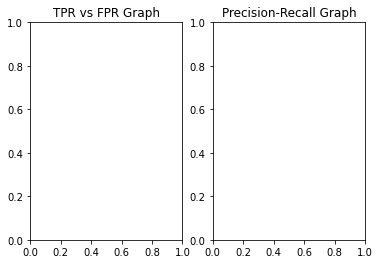

In [43]:
y_cls = label_binarize(y_train, classes=['<=50K', '>50K'])

graph, Ax = plt.subplots(1,2)
Ax[0].set_title('TPR vs FPR Graph')
Ax[1].set_title('Precision-Recall Graph')

**The above graph will be the template we show(combine) all algorithm's graph**

## 3.2 Model Training Start Here

### 3.2.1 Adaboost
**Hyper parameter:**
*    `'n_estimators': [25,50,100]`(example from grid form) **Default：** `50`
*    `'learning_rate':[0.5,1.0,1.5]'`(example from grid form) **Default：** `1.0`

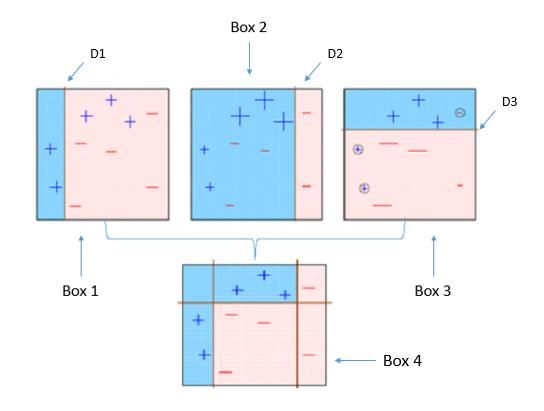

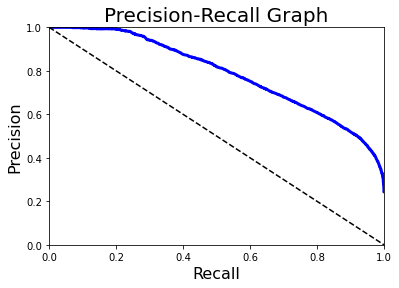

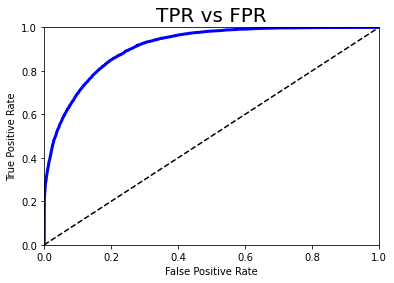

accuracy  precision  recall  f1_score  sensitivity  \
Adaboost (train)    0.8595     0.7543  0.6004    0.6686       0.6004   

                  specificity  error_rate  mean_cross_val_score  auc_score  \
Adaboost (train)       0.9396      0.1405                0.8587     0.9112   

                  train time  pred time  
Adaboost (train)      6.0628     0.6807

In [44]:
ada = AdaBoostClassifier(random_state=42)  
value_ada= train(ada,'decision_function', X_train, y_train)
ovl_ada= round(pd.DataFrame([value_ada], index = ['Adaboost (train)']),4)
display(ovl_ada)

### 3.2.2 Artificial Neural network
**Parameter**
*  `'activation':['identity','logistic', 'tanh', 'relu'] ` **Default=`'relu'`**
*  `'hidden_layer_sizes':[(50,),(100,),(150,)]`(example in grid form) **Default=`(100,)`**

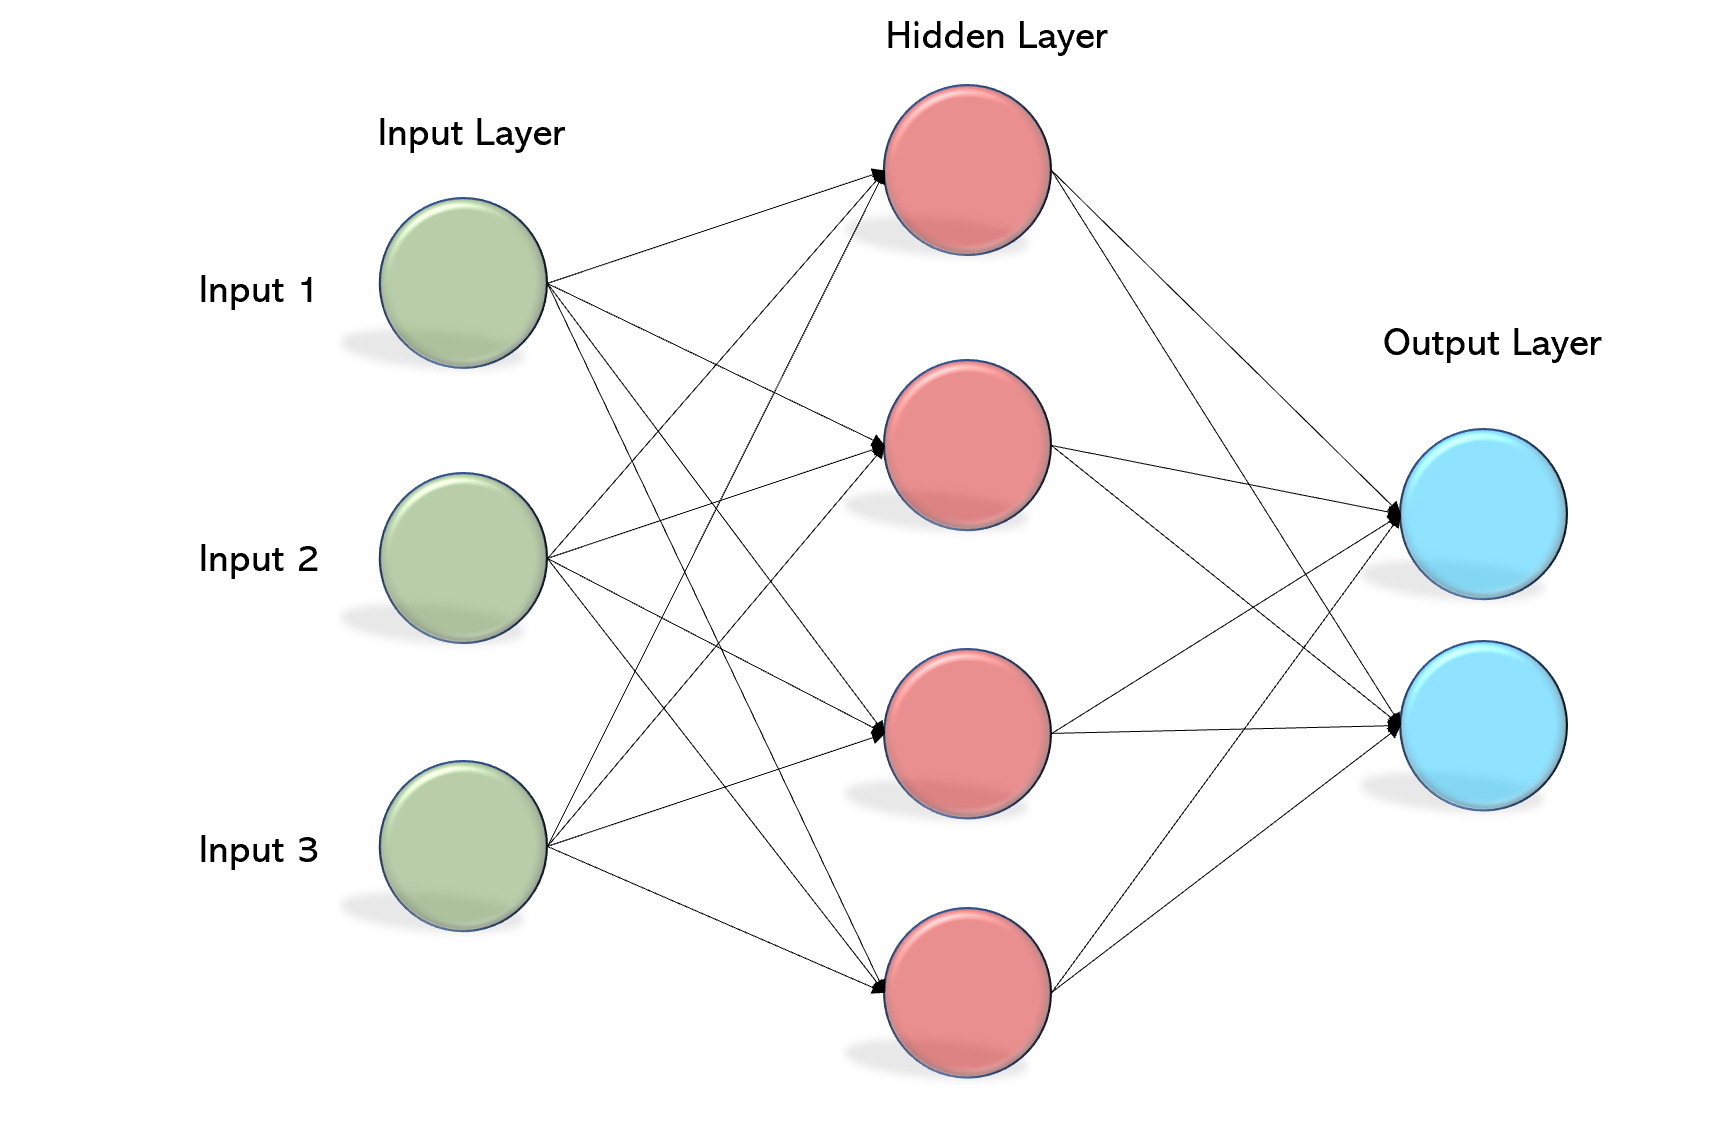






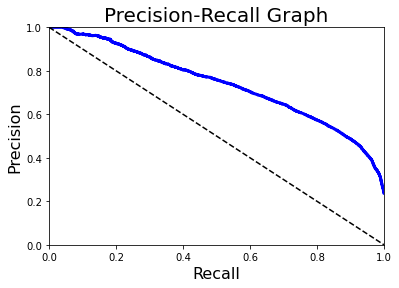

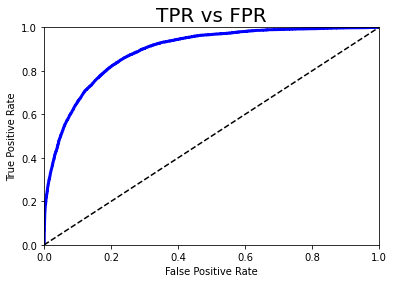

accuracy  precision  recall  f1_score  \
Artificial Neural Network (train)    0.8872     0.7856  0.7184    0.7505   

                                   sensitivity  specificity  error_rate  \
Artificial Neural Network (train)       0.7184       0.9394      0.1128   

                                   mean_cross_val_score  auc_score  \
Artificial Neural Network (train)                0.8469     0.8918   

                                   train time  pred time  
Artificial Neural Network (train)     96.9095     0.1581

In [45]:
ann = MLPClassifier(max_iter=1000, random_state=42)
value_ann= train(ann,'predict_proba', X_train, y_train)
ovl_ann = round(pd.DataFrame([value_ann], index = ['Artificial Neural Network (train)']),4)
display(ovl_ann)

### 3.2.3 Decision Tree

**Hyper Parameter:**
*	`*'criterion':['gini','entrophy']*` **Default:** `gini`
* `*'min_samples_leaf':[1,2,3]*`(example in grid form)**Default:** `1`
*	`*min_samples_split:[1,2,3]`(example in grid form) **Default:** `2`

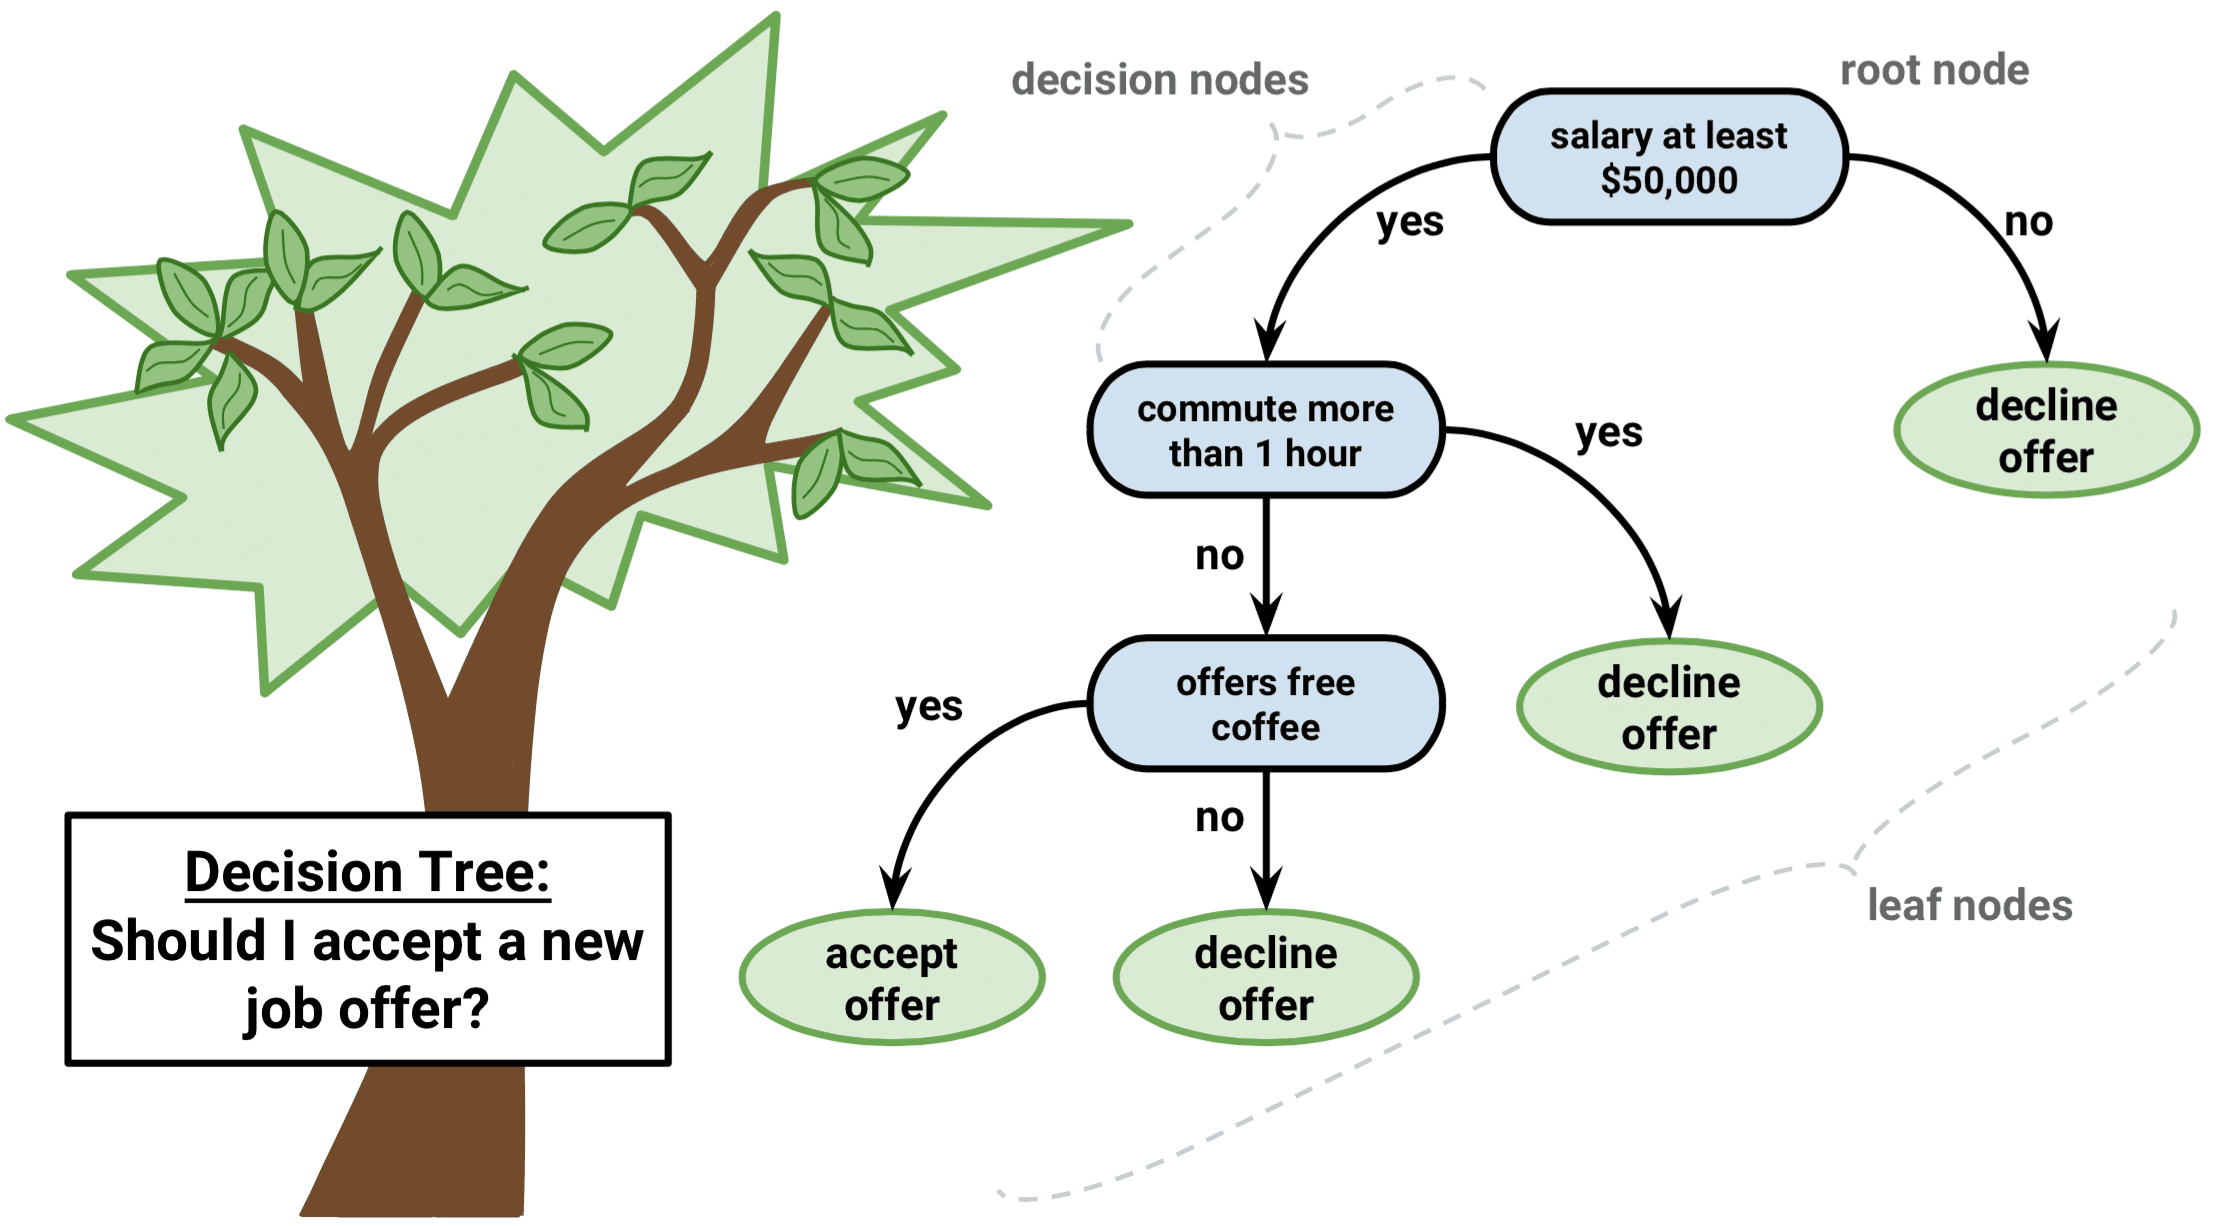



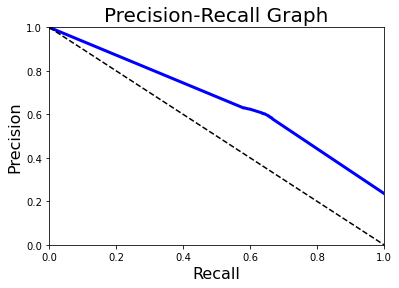

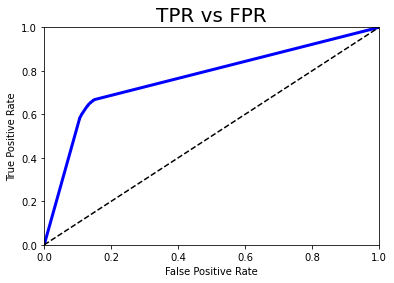

accuracy  precision  recall  f1_score  sensitivity  \
Decision Tree (train)    0.9722     0.9803  0.9004    0.9387       0.9004   

                       specificity  error_rate  mean_cross_val_score  \
Decision Tree (train)       0.9944      0.0278                  0.82   

                       auc_score  train time  pred time  
Decision Tree (train)     0.7674      0.4952      0.017

In [46]:
dtree = DecisionTreeClassifier(max_features = None, random_state=42)
value_dtree= train(dtree,'predict_proba',X_train, y_train)
ovl_dtree= round(pd.DataFrame([value_dtree], index = ['Decision Tree (train)']),4)
display(ovl_dtree)

### 3.2.4 K Nearest Neighbours
**Hyperparameter**
* `'n_neighbors':[3,5,9]`(example in grid form) **Default:** `5`

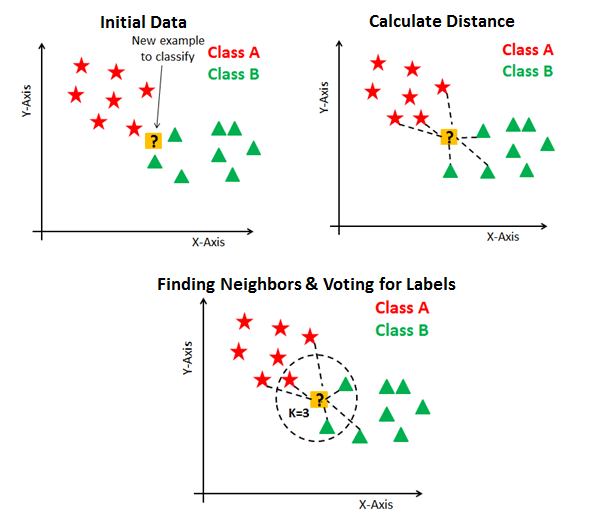



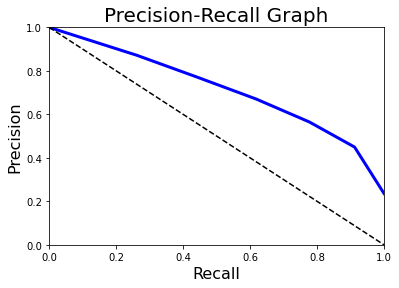

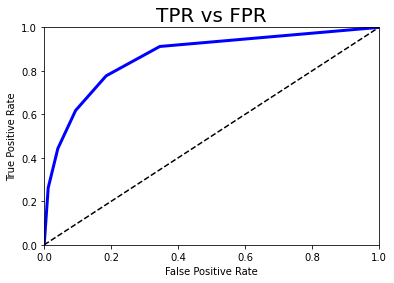

accuracy  precision  recall  f1_score  \
K Nearest Neighbours (train)    0.8841     0.7812   0.707    0.7423   

                              sensitivity  specificity  error_rate  \
K Nearest Neighbours (train)        0.707       0.9388      0.1159   

                              mean_cross_val_score  auc_score  train time  \
K Nearest Neighbours (train)                0.8381     0.8648      4.0206   

                              pred time  
K Nearest Neighbours (train)    52.6584

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
value_knn= train(knn,'predict_proba', X_train, y_train)
ovl_knn= round(pd.DataFrame([value_knn], index = ['K Nearest Neighbours (train)']),4)
display(ovl_knn)


### 3.2.5 Logistic Regression
​**Hyper parameter:**
* `'tol':[1e-2,1e-3,1e-4,1e-5,1e-6]`(example in grid form) **Default:** `1e-3`
* `''C':[0.5,1,1.5]`(example in grid form) **Default:** `1`

**Max Ilteration must be increased(cannot use default)**

**
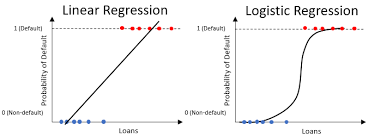



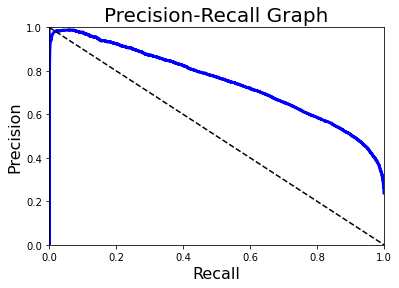

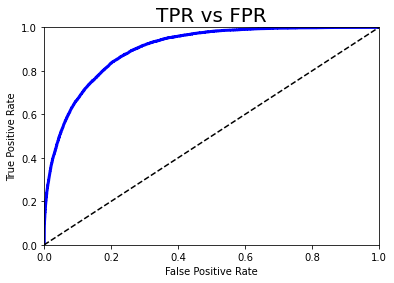

accuracy  precision  recall  f1_score  \
Logistic Regression (train)     0.851     0.7293  0.5866    0.6502   

                             sensitivity  specificity  error_rate  \
Logistic Regression (train)       0.5866       0.9327       0.149   

                             mean_cross_val_score  auc_score  train time  \
Logistic Regression (train)                0.8502     0.9016      3.5185   

                             pred time  
Logistic Regression (train)      0.006

In [48]:
logreg = LogisticRegression(max_iter=1000)
value_logreg= train(logreg,'decision_function', X_train, y_train)
ovl_logreg= round(pd.DataFrame([value_logreg], index = ['Logistic Regression (train)']),4)
display(ovl_logreg)

### 3.2.6 Random Forest
**Hyperparameter:**

* `'criterion':['gini', 'entropy']` **Default:** `gini`
* `'n_estimators':[50,100,200]`（example in grid form） **Default:**`100` 


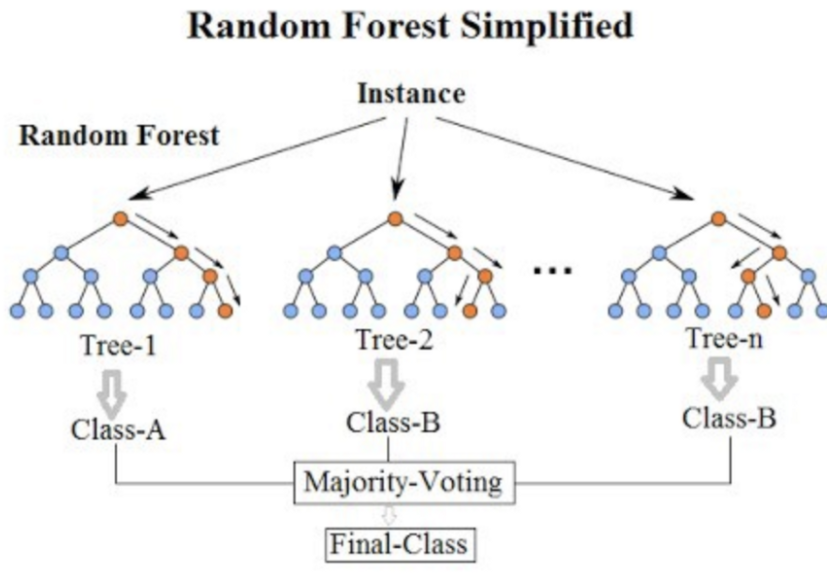


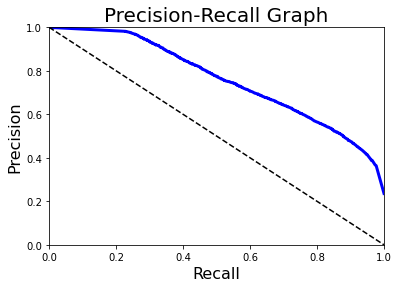

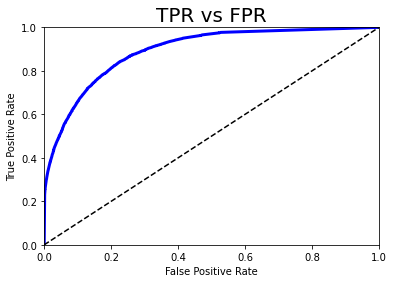

accuracy  precision  recall  f1_score  sensitivity  \
Random Forest (train)    0.9722     0.9576  0.9229      0.94       0.9229   

                       specificity  error_rate  mean_cross_val_score  \
Random Forest (train)       0.9874      0.0278                0.8466   

                       auc_score  train time  pred time  
Random Forest (train)      0.892     30.9596     0.8449

In [49]:
rforest = RandomForestClassifier(max_features = None)
value_rforest= train(rforest,'predict_proba', X_train, y_train)
ovl_rforest= round(pd.DataFrame([value_rforest], index = ['Random Forest (train)']),4)
display(ovl_rforest)

### 3.2.7 SGD Classifier
**Parameter**
*   `penalty = {'l2', 'l1', 'elasticnet'}` **Default:** `'l2'` 


The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.

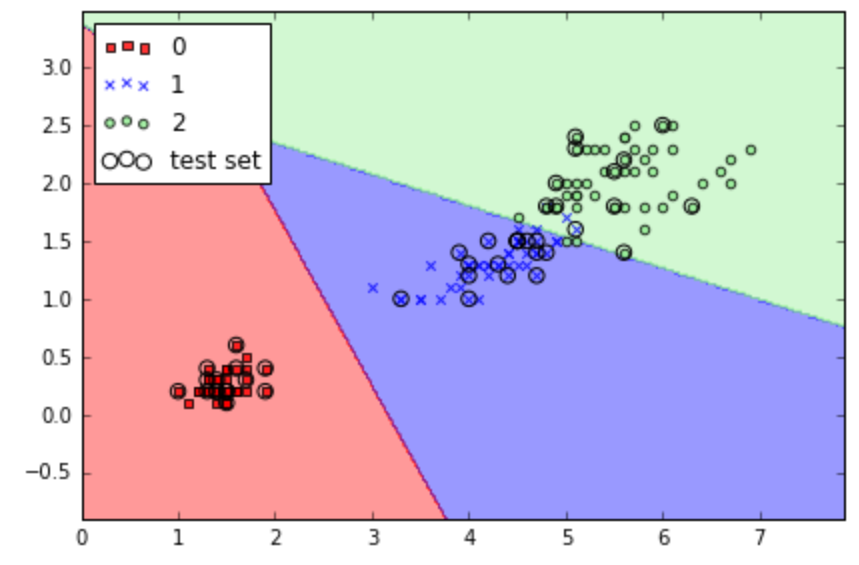

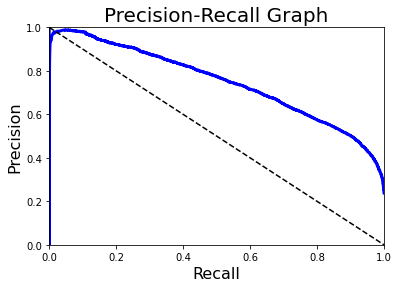

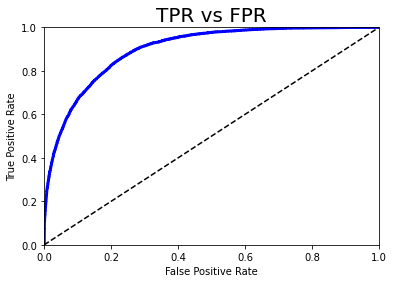

accuracy  precision  recall  f1_score  sensitivity  \
SGD Classifier (train)    0.8499     0.7553  0.5386    0.6288       0.5386   

                        specificity  error_rate  mean_cross_val_score  \
SGD Classifier (train)       0.9461      0.1501                0.8481   

                        auc_score  train time  pred time  
SGD Classifier (train)     0.8985     12.2148      0.006

In [50]:
sgd = SGDClassifier(random_state = 42,tol = None)
value_sgd = train(sgd,'decision_function', X_train, y_train)
ovl_sgd = round(pd.DataFrame([value_sgd], index = ['SGD Classifier (train)']),4)
display(ovl_sgd)

## 3.2.8 Support Vector Machine (SVM)
**Parameter**
*   `'kernel': ['linear', 'poly', 'rbf', 'sigmoid']`  **Default:** `'rbf'` 
*   `'tol':[0.01,0.001,0.0001]`（example in grid form） **Default:** `'0.001'` 

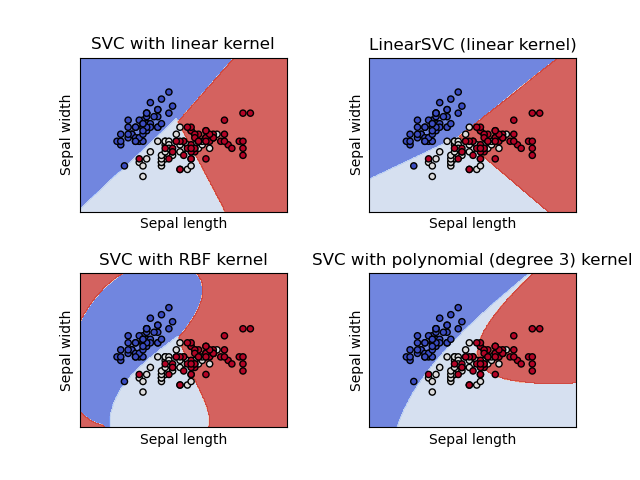

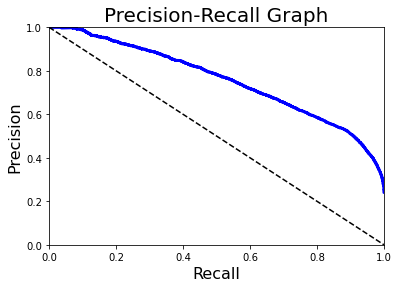

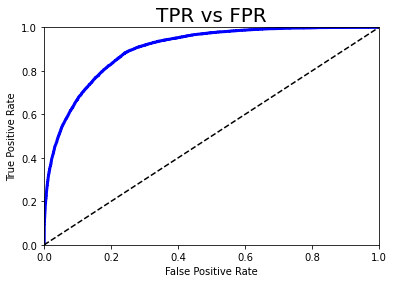

accuracy  precision  recall  f1_score  \
Support Vector Machine (train)    0.8528     0.7575   0.554    0.6399   

                                sensitivity  specificity  error_rate  \
Support Vector Machine (train)        0.554       0.9452      0.1472   

                                mean_cross_val_score  auc_score  train time  \
Support Vector Machine (train)                0.8515     0.9009     98.4937   

                                pred time  
Support Vector Machine (train)     58.821

In [51]:
svm = SVC(random_state = 42)
value_svm = train(svm,'decision_function', X_train, y_train)
ovl_svm = round(pd.DataFrame([value_svm], index = ['Support Vector Machine (train)']),4)
display(ovl_svm)

# 4.0 Comparison of Classifiers


In [52]:
classifier_list = [ada, ann, dtree, knn, logreg, rforest, sgd, svm]
clf_labels = ['Adaboost' ,'Artificial Neural Network','Decision Tree'
              ,'K Nearest Neighbours','Logistic Regression','Random Forest'
              ,'SGD Classifier','Support Vector Machine']

clf_labels_test = [append +" (test)" for append in clf_labels]
clf_labels_fine_tune_test = [append + " (fine_tune_test)" for append in clf_labels]

method = ['decision_function',
          'predict_proba',
          'predict_proba',
          'predict_proba',
          'decision_function',
          'predict_proba',
          'decision_function',
          'decision_function'      
]

accuracy  precision  recall  f1_score  \
Adaboost (train)                     0.8595     0.7543  0.6004    0.6686   
Logistic Regression (train)          0.8510     0.7293  0.5866    0.6502   
Support Vector Machine (train)       0.8528     0.7575  0.5540    0.6399   
SGD Classifier (train)               0.8499     0.7553  0.5386    0.6288   
Random Forest (train)                0.9722     0.9576  0.9229    0.9400   
Artificial Neural Network (train)    0.8872     0.7856  0.7184    0.7505   
K Nearest Neighbours (train)         0.8841     0.7812  0.7070    0.7423   
Decision Tree (train)                0.9722     0.9803  0.9004    0.9387   

                                   sensitivity  specificity  error_rate  \
Adaboost (train)                        0.6004       0.9396      0.1405   
Logistic Regression (train)             0.5866       0.9327      0.1490   
Support Vector Machine (train)          0.5540       0.9452      0.1472   
SGD Classifier (train)                  0.5386       0.9461      0.1501   
Random Forest (train)                   0.9229       0.9874      0.0278   
Artificial Neural Network (train)       0.7184       0.9394      0.1128   
K Nearest Neighbours (train)            0.7070       0.9388      0.1159   
Decision Tree (train)                   0.9004       0.9944      0.0278   

                                   mean_cross_val_score  auc_score  \
Adaboost (train)                                 0.8587     0.9112   
Logistic Regression (train)                      0.8502     0.9016   
Support Vector Machine (train)                   0.8515     0.9009   
SGD Classifier (train)                           0.8481     0.8985   
Random Forest (train)                            0.8466     0.8920   
Artificial Neural Network (train)                0.8469     0.8918   
K Nearest Neighbours (train)                     0.8381     0.8648   
Decision Tree (train)                            0.8200     0.7674   

                                   train time  pred time  
Adaboost (train)                       6.0628     0.6807  
Logistic Regression (train)            3.5185     0.0060  
Support Vector Machine (train)        98.4937    58.8210  
SGD Classifier (train)                12.2148     0.0060  
Random Forest (train)                 30.9596     0.8449  
Artificial Neural Network (train)     96.9095     0.1581  
K Nearest Neighbours (train)           4.0206    52.6584  
Decision Tree (train)                  0.4952     0.0170

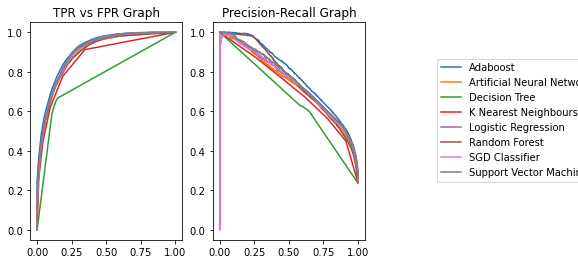

In [53]:
ovl_train_pred = pd.concat([ovl_sgd,ovl_ann, ovl_svm, ovl_rforest,ovl_dtree, ovl_ada, ovl_logreg, ovl_knn], axis = 0)
ovl_train_pred.sort_values(by = ['auc_score'], ascending = False, inplace = True)
display(ovl_train_pred)
graph.legend(clf_labels,loc='center left', bbox_to_anchor=(1, 0.5))
graph

**As we notice that, the 3 highest is Adaboost, SVM, Logistic Regression and Random Forest, but it may be have overfitting issue**

# 5.0 Fine-Tune Model




## 5.1 Define Fine Tune Function

**Grid search vs Random search**
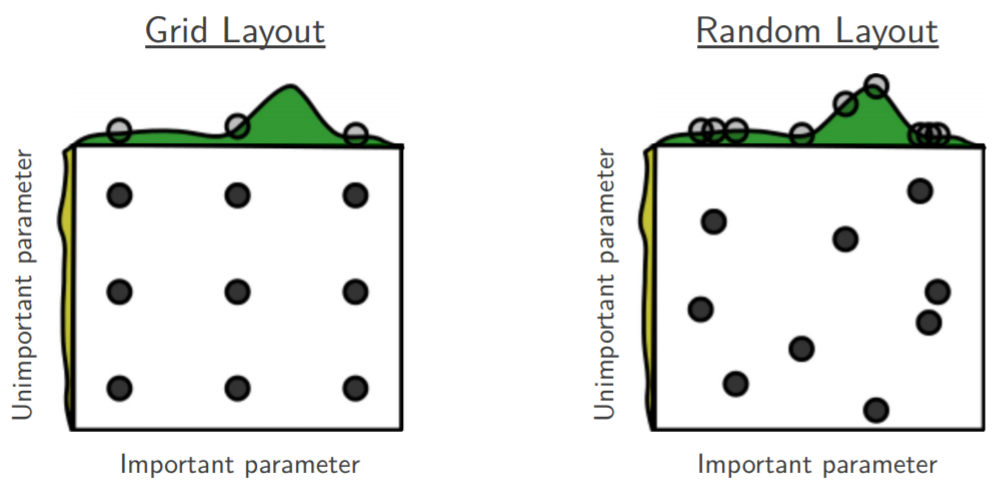

In [54]:
# Random Search
def fineTune(X_train, y_train, clf, params,num, method,name):
    random = RandomizedSearchCV(clf, params,cv=3,n_iter=num,scoring='roc_auc',random_state=42)

    start=time()
    random.fit(X_train, y_train)
    end=time()


    print(random.best_params_)
    best_model = random.best_estimator_
    ovl_grid= model_eval(X_train, y_train, best_model,method,end-start)
    ovl_grid = round(pd.DataFrame([ovl_grid], index = [name]),4)
    return best_model, ovl_grid


In [55]:
# Grid Search
def fineTune2(X_train, y_train, clf, params,method,name):
    grid = GridSearchCV(clf, params, cv=3, scoring='roc_auc')

    start=time()
    grid.fit(X_train, y_train)
    end=time()


    print(grid.best_params_)
    best_model = grid.best_estimator_
    ovl_grid= model_eval(X_train, y_train, best_model,method,end-start)
    ovl_grid = round(pd.DataFrame([ovl_grid], index = [name]),4)
    return best_model, ovl_grid

Redeclare the plot

Text(0.5, 1.0, 'Precision-Recall Graph')

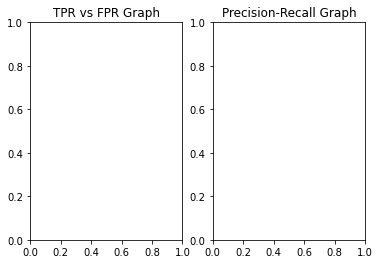

In [56]:
graph_fineTune, Ax = plt.subplots(1,2)
Ax[0].set_title('TPR vs FPR Graph')
Ax[1].set_title('Precision-Recall Graph')

## 5.2 Fine Tune start here

### 5.2.1 Adaboost
**Hyper parameter:**
*    'n_estimators': [25,50,100] **Default：** `50`
*    'learning_rate':[0.5,1.0,1.5] **Default：** `1.0`

**Grid Search**

{'learning_rate': 1.0, 'n_estimators': 50}


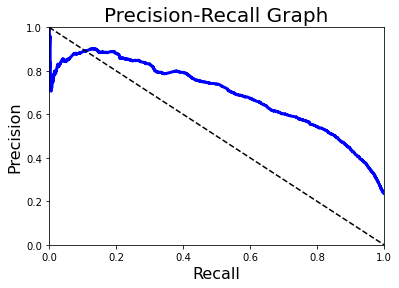

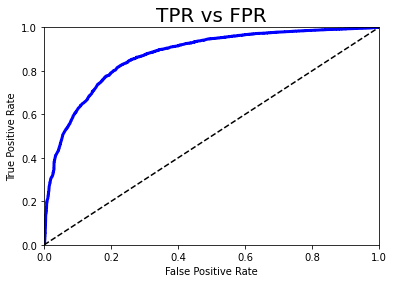

accuracy  precision  recall  f1_score  sensitivity  \
Adaboost (fine_train)    0.9722     0.9545  0.9264    0.9403       0.9264   

                       specificity  error_rate  mean_cross_val_score  \
Adaboost (fine_train)       0.9864      0.0278                0.8366   

                       auc_score  train time  pred time  
Adaboost (fine_train)     0.8714    306.1463      0.871

In [57]:
params = {
    'n_estimators': [45,50,55],
    'learning_rate':[0.5,1.0,1.5]
}

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
ada_best_model,ovl_grid_ada=fineTune2(X_train, y_train, clf, params, 'decision_function','Adaboost (fine_train)')
display(ovl_grid_ada)

**Random Search**

In random search we can fix the number of iteration as grid search's ilteration is (3x3=9). The result can improved as the range of parameter is increased

{'n_estimators': 30, 'learning_rate': 1.0}


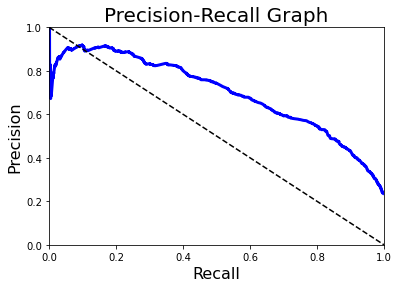

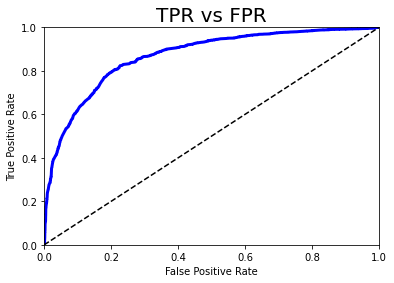

accuracy  precision  recall  f1_score  sensitivity  \
Adaboost (fine_train)    0.9722     0.9493  0.9321    0.9406       0.9321   

                       specificity  error_rate  mean_cross_val_score  \
Adaboost (fine_train)       0.9846      0.0278                0.8345   

                       auc_score  train time  pred time  
Adaboost (fine_train)     0.8681    203.6425      0.478

In [58]:
params = {
    'n_estimators': [int(x) for x in np.linspace(start = 30, stop = 60, num = 10)],
    'learning_rate':[x for x in np.linspace(start = 0.5, stop = 5.0, num = 10)]
}

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
ada_best_model,ovl_fine_ada=fineTune(X_train, y_train, clf, params, 9, 'decision_function','Adaboost (fine_train)')
display(ovl_fine_ada)

### 5.2.2 Artificial Neural Network
**Parameter**
*  `'activation':['identity','logistic', 'tanh', 'relu'] ` **Default=`'relu'`**
*  `'hidden_layer_sizes':[(50,),(100,),(150,)]` （example in grid form） **Default=`(100,)`**

**max_iter need to increased to 3000*, if not tanh will not converge**

{'hidden_layer_sizes': (150,), 'activation': 'identity'}


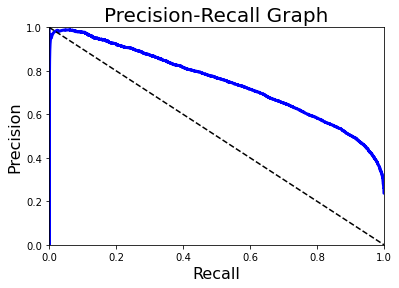

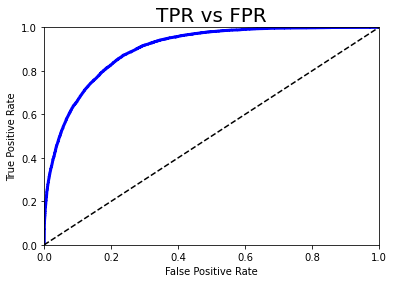

accuracy  precision  recall  f1_score  \
Artificial Neural Network (fine_train)     0.851     0.7402  0.5683     0.643   

                                        sensitivity  specificity  error_rate  \
Artificial Neural Network (fine_train)       0.5683       0.9383       0.149   

                                        mean_cross_val_score  auc_score  \
Artificial Neural Network (fine_train)                0.8494     0.9004   

                                        train time  pred time  
Artificial Neural Network (fine_train)   3128.9858     0.0294

In [59]:
clf = MLPClassifier(max_iter=3000, random_state=42)

params = {
    'activation':['identity','logistic', 'tanh', 'relu'], 
    'hidden_layer_sizes':[(int(x),) for x in np.linspace(start = 50, stop = 150, num = 10)]
}

ann_best_model,ovl_fine_ann=fineTune(X_train, y_train, clf,params,12, 'predict_proba','Artificial Neural Network (fine_train)')
display(ovl_fine_ann)

### 5.2.3 Decision Tree

**Hyper Parameter:**

*	`*min_samples_split:[1,2,3]` **Default:** `2`
*	`*min_samples_leaf:[1,2,3]` **Default:** `1`

{'min_samples_split': 2, 'min_samples_leaf': 3}


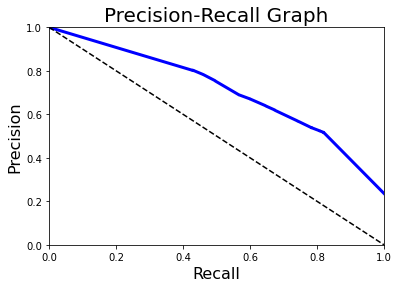

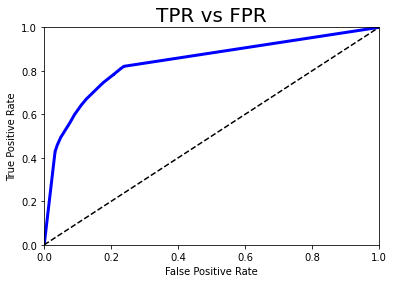

accuracy  precision  recall  f1_score  \
Decision tree (fine_train)    0.9172     0.8788   0.753     0.811   

                            sensitivity  specificity  error_rate  \
Decision tree (fine_train)        0.753       0.9679      0.0828   

                            mean_cross_val_score  auc_score  train time  \
Decision tree (fine_train)                 0.836     0.8375      2.5234   

                            pred time  
Decision tree (fine_train)     0.0155

In [60]:
clf = DecisionTreeClassifier(max_features = None, random_state=42)

params = {
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2,3]
}


dtree_best_model,ovl_fine_dtree=fineTune(X_train, y_train, clf,params,2, 'predict_proba','Decision tree (fine_train)')
display(ovl_fine_dtree)

### 5.2.4 K Nearest Neighbours

* `'n_neighbors':[3,5,9]`（example in grid form） **Default:** `5`

{'n_neighbors': 9}


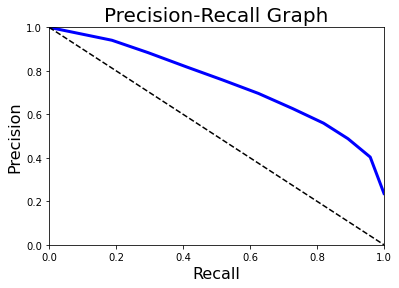

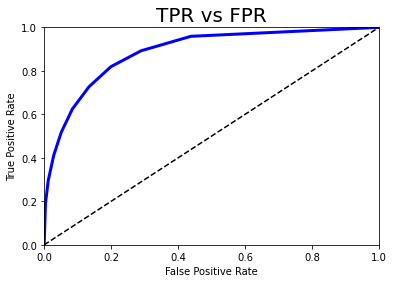

accuracy  precision  recall  f1_score  \
K Nearest Neighbour (fine_train)    0.8741     0.7642   0.675    0.7168   

                                  sensitivity  specificity  error_rate  \
K Nearest Neighbour (fine_train)        0.675       0.9356      0.1259   

                                  mean_cross_val_score  auc_score  train time  \
K Nearest Neighbour (fine_train)                0.8471     0.8868    167.4556   

                                  pred time  
K Nearest Neighbour (fine_train)    71.2494

In [61]:
clf = KNeighborsClassifier(n_neighbors=2)

params = {
    'n_neighbors':[int(x) for x in np.linspace(start = 1, stop = 11, num = 10)]
}

knn_best_model,ovl_fine_knn=fineTune(X_train, y_train, clf,params,3, 'predict_proba','K Nearest Neighbour (fine_train)')
display(ovl_fine_knn)

### 5.2.5 Logistic regression
​**Hyper parameter:**
* `'tol':[1e-2,1e-3,1e-4,1e-5,1e-6]` （example in grid form）**Default:** `1e-3`
* `'C':[0.5,1,1.5]` （example in grid form）**Default:** `1`

**Max Ilteration must be increased(cannot use default)**

{'tol': 0.1, 'C': 0.8333333333333333}


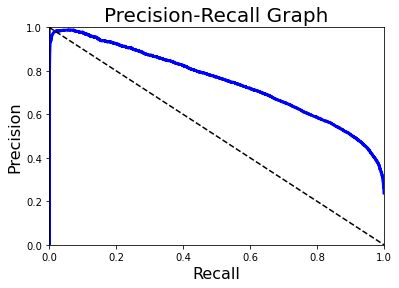

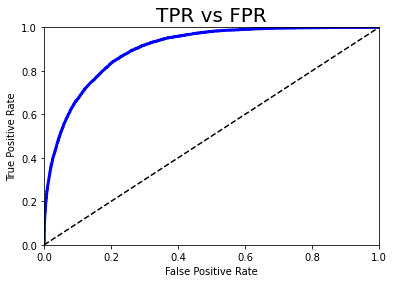

accuracy  precision  recall  f1_score  \
Logistic Regression (fine_train)    0.8511     0.7295  0.5869    0.6505   

                                  sensitivity  specificity  error_rate  \
Logistic Regression (fine_train)       0.5869       0.9327      0.1489   

                                  mean_cross_val_score  auc_score  train time  \
Logistic Regression (fine_train)                0.8503     0.9016     51.3645   

                                  pred time  
Logistic Regression (fine_train)      0.006

In [62]:
clf = LogisticRegression(max_iter=1000)

params = {
    'tol':[x for x in np.linspace(start = 0.0001, stop = 0.1, num = 10)],
    'C':[x for x in np.linspace(start = 0.5, stop = 1.5, num = 10)]
}

log_best_model,ovl_fine_log=fineTune(X_train, y_train, clf,params,6, 'predict_proba','Logistic Regression (fine_train)')
display(ovl_fine_log)


### 5.2.6 Random Forest
**Hyper parameter:**

* `'criterion':['gini', 'entropy']` **Default:** `gini`
* `'n_estimators':[50,100,200]`（example in grid form） **Default:**`100` 


{'n_estimators': 166, 'criterion': 'entropy'}


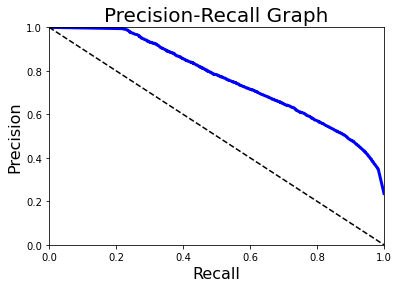

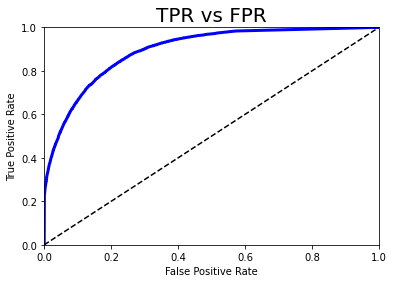

accuracy  precision  recall  f1_score  \
Random Forest (fine_train)    0.9722     0.9571  0.9237    0.9401   

                            sensitivity  specificity  error_rate  \
Random Forest (fine_train)       0.9237       0.9872      0.0278   

                            mean_cross_val_score  auc_score  train time  \
Random Forest (fine_train)                0.8488      0.895    381.9646   

                            pred time  
Random Forest (fine_train)     1.2415

In [63]:
clf= RandomForestClassifier(max_features = None)

params = {
    'criterion':['gini', 'entropy'], 
    'n_estimators':[int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
}

rforest_best_model,ovl_fine_rforest=fineTune(X_train, y_train, clf,params,6, 'predict_proba','Random Forest (fine_train)')

display(ovl_fine_rforest)

### 5.2.7 SGD Classifier

**Parameter**
*   `penalty = {'l2', 'l1', 'elasticnet'}` **Default:** `'l2'` 
*   `'tol':[0.1,0.001,0.0001]`（example in grid form）**Default:** `'0.00001'

{'penalty': 'l2', 'alpha': 0.055600000000000004}


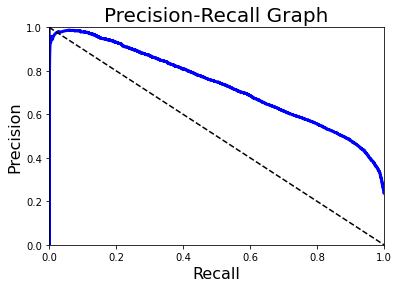

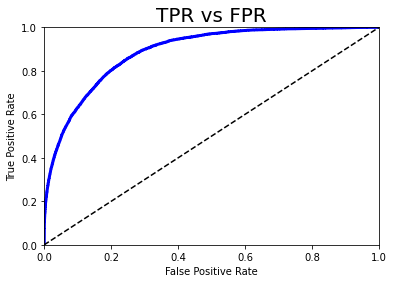

accuracy  precision  recall  f1_score  \
SGD Classifier (fine_train)    0.8364     0.8101  0.4012    0.5367   

                             sensitivity  specificity  error_rate  \
SGD Classifier (fine_train)       0.4012       0.9709      0.1636   

                             mean_cross_val_score  auc_score  train time  \
SGD Classifier (fine_train)                0.8369     0.8883      96.991   

                             pred time  
SGD Classifier (fine_train)      0.006

In [64]:
clf = SGDClassifier(random_state = 42,tol = None)

params = {
    'penalty':['l2','l1','elasticnet'],
    'alpha': [x for x in np.linspace(start = 0.0001, stop = 0.1, num = 10)]
}


sgd_best_model,ovl_fine_sgd=fineTune(X_train, y_train, clf,params,3, 'decision_function','SGD Classifier (fine_train)')
display(ovl_fine_sgd)

### 5.2.8 Support Vector Machine
**Hyper parameter**
*   `'kernel': ['linear', 'poly', 'rbf', 'sigmoid']`  **Default:** `'rbf'` 
*   `'tol':[0.1,0.001,0.0001]`,（example in grid form） **Default:** `'0.001'` 

{'tol': 0.06670000000000001, 'kernel': 'poly'}


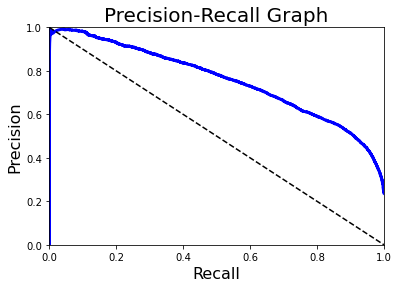

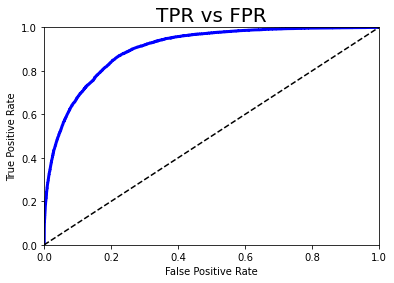

accuracy  precision  recall  f1_score  \
Support Vector Machine (fine_train)    0.8529      0.774  0.5327    0.6311   

                                     sensitivity  specificity  error_rate  \
Support Vector Machine (fine_train)       0.5327       0.9519      0.1471   

                                     mean_cross_val_score  auc_score  \
Support Vector Machine (fine_train)                0.8506     0.9019   

                                     train time  pred time  
Support Vector Machine (fine_train)   1893.0217    49.1957

In [65]:
clf = SVC(random_state = 42)
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'tol':[x for x in np.linspace(start = 0.0001, stop = 0.1, num = 10)]
}

svc_best_model,ovl_fine_svc=fineTune(X_train, y_train, clf,params,12, 'decision_function','Support Vector Machine (fine_train)')

display(ovl_fine_svc)

# 6.0 Predict

## 6.1 See some reference



### 6.1.1 All algorithm in train data

accuracy  precision  recall  f1_score  \
Adaboost (train)                     0.8595     0.7543  0.6004    0.6686   
Logistic Regression (train)          0.8510     0.7293  0.5866    0.6502   
Support Vector Machine (train)       0.8528     0.7575  0.5540    0.6399   
SGD Classifier (train)               0.8499     0.7553  0.5386    0.6288   
Random Forest (train)                0.9722     0.9576  0.9229    0.9400   
Artificial Neural Network (train)    0.8872     0.7856  0.7184    0.7505   
K Nearest Neighbours (train)         0.8841     0.7812  0.7070    0.7423   
Decision Tree (train)                0.9722     0.9803  0.9004    0.9387   

                                   sensitivity  specificity  error_rate  \
Adaboost (train)                        0.6004       0.9396      0.1405   
Logistic Regression (train)             0.5866       0.9327      0.1490   
Support Vector Machine (train)          0.5540       0.9452      0.1472   
SGD Classifier (train)                  0.5386       0.9461      0.1501   
Random Forest (train)                   0.9229       0.9874      0.0278   
Artificial Neural Network (train)       0.7184       0.9394      0.1128   
K Nearest Neighbours (train)            0.7070       0.9388      0.1159   
Decision Tree (train)                   0.9004       0.9944      0.0278   

                                   mean_cross_val_score  auc_score  \
Adaboost (train)                                 0.8587     0.9112   
Logistic Regression (train)                      0.8502     0.9016   
Support Vector Machine (train)                   0.8515     0.9009   
SGD Classifier (train)                           0.8481     0.8985   
Random Forest (train)                            0.8466     0.8920   
Artificial Neural Network (train)                0.8469     0.8918   
K Nearest Neighbours (train)                     0.8381     0.8648   
Decision Tree (train)                            0.8200     0.7674   

                                   train time  pred time  
Adaboost (train)                       6.0628     0.6807  
Logistic Regression (train)            3.5185     0.0060  
Support Vector Machine (train)        98.4937    58.8210  
SGD Classifier (train)                12.2148     0.0060  
Random Forest (train)                 30.9596     0.8449  
Artificial Neural Network (train)     96.9095     0.1581  
K Nearest Neighbours (train)           4.0206    52.6584  
Decision Tree (train)                  0.4952     0.0170

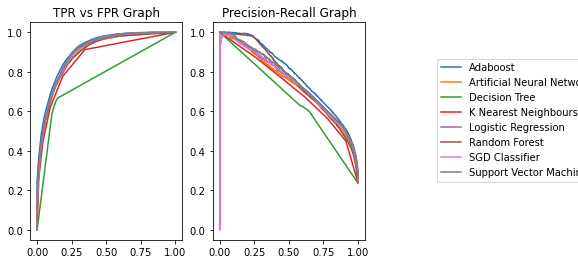

In [66]:
display(ovl_train_pred)
graph

### 6.1.2 All algorithm in test data

Setting a new graph

Text(0.5, 1.0, 'Precision-Recall Graph')

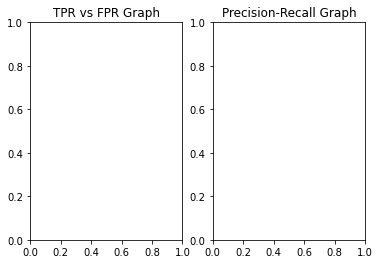

In [67]:
y_cls = label_binarize(y_test, classes=['<=50K', '>50K'])
graph_test, Ax = plt.subplots(1,2)
Ax[0].set_title('TPR vs FPR Graph')
Ax[1].set_title('Precision-Recall Graph')


Start
Adaboost (test)


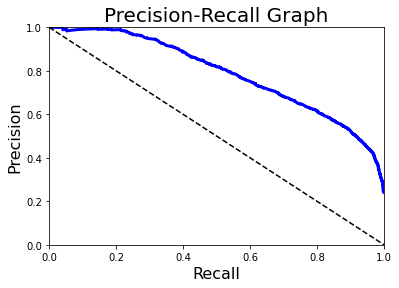

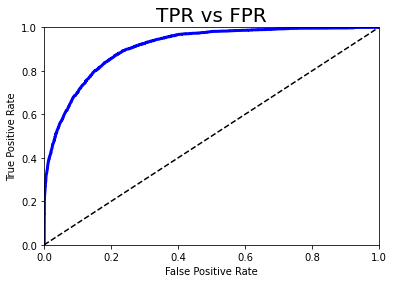

Artificial Neural Network (test)


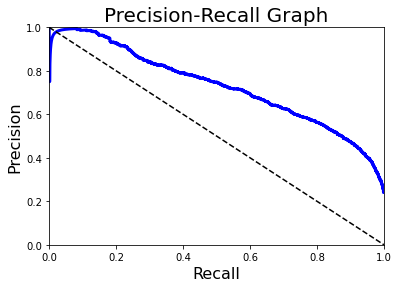

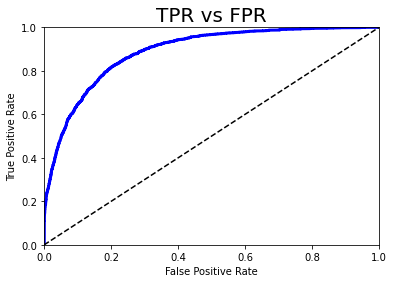

Decision Tree (test)


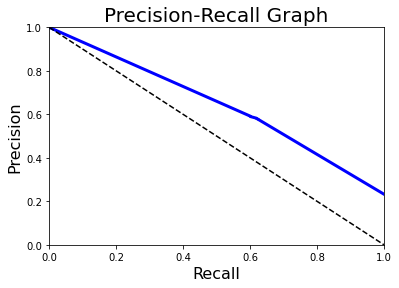

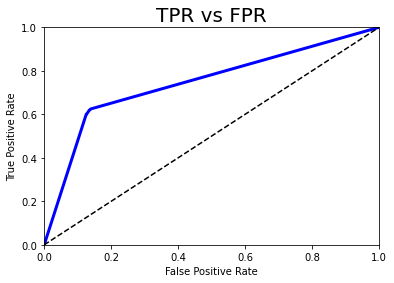

K Nearest Neighbours (test)


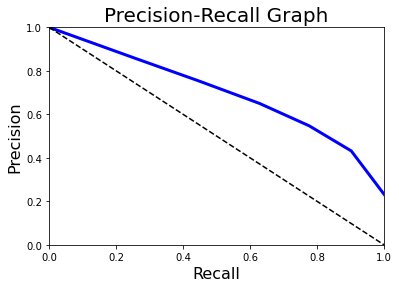

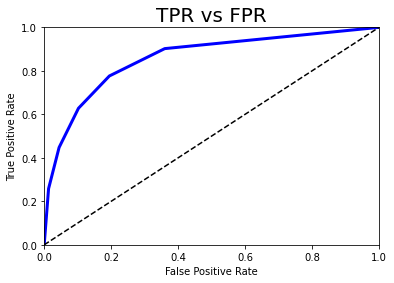

Logistic Regression (test)


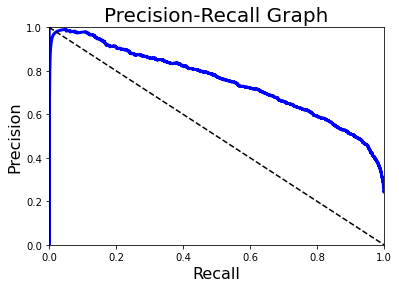

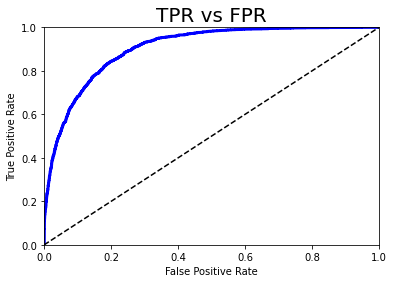

Random Forest (test)


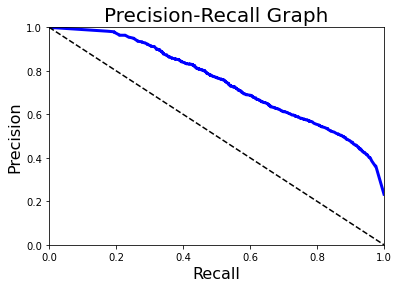

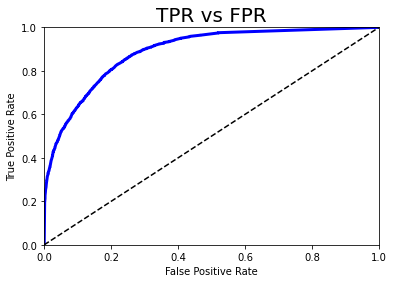

SGD Classifier (test)


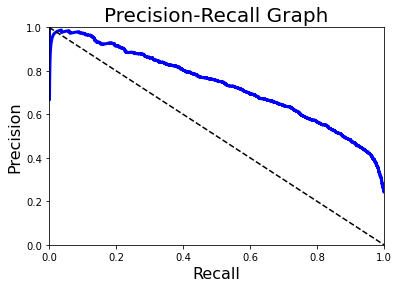

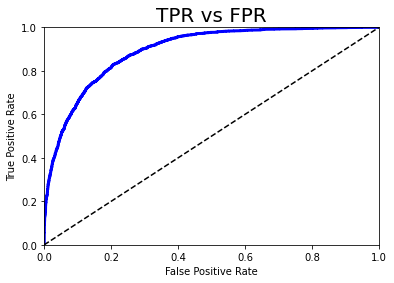

Support Vector Machine (test)


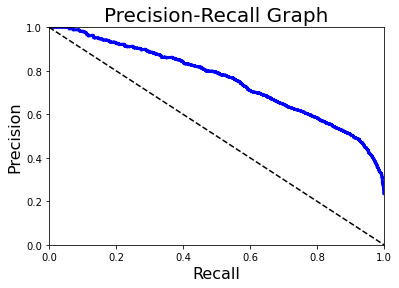

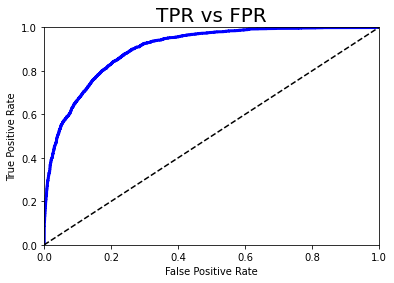

In [68]:
ovl_test_pred=pd.DataFrame()
print("Start")
for model,label,met in zip(classifier_list,clf_labels_test,method):
    print(label)
    value_pred = model_eval(X_test, y_test,model,met,-1)
    ovl_pred = round(pd.DataFrame([value_pred], index = [label]),4)
    ovl_test_pred=pd.concat([ovl_test_pred,ovl_pred], axis = 0) 
ovl_test_pred.sort_values(by = ['mean_cross_val_score'], inplace = True)

accuracy  precision  recall  f1_score  \
Decision Tree (test)                0.8286     0.6359  0.6156    0.6256   
K Nearest Neighbours (test)         0.8449     0.6749  0.6431    0.6586   
SGD Classifier (test)               0.8532     0.7503  0.5529    0.6366   
Artificial Neural Network (test)    0.8537     0.6987  0.6524    0.6748   
Random Forest (test)                0.8555     0.7113  0.6373    0.6723   
Logistic Regression (test)          0.8543     0.7240  0.6040    0.6586   
Support Vector Machine (test)       0.8548     0.7527  0.5600    0.6422   
Adaboost (test)                     0.8626     0.7491  0.6156    0.6758   

                                  sensitivity  specificity  error_rate  \
Decision Tree (test)                   0.6156       0.8932      0.1714   
K Nearest Neighbours (test)            0.6431       0.9061      0.1551   
SGD Classifier (test)                  0.5529       0.9442      0.1468   
Artificial Neural Network (test)       0.6524       0.9147      0.1463   
Random Forest (test)                   0.6373       0.9216      0.1445   
Logistic Regression (test)             0.6040       0.9302      0.1457   
Support Vector Machine (test)          0.5600       0.9442      0.1452   
Adaboost (test)                        0.6156       0.9375      0.1374   

                                  mean_cross_val_score  auc_score  train time  \
Decision Tree (test)                            0.8100     0.7454          -1   
K Nearest Neighbours (test)                     0.8349     0.8562          -1   
SGD Classifier (test)                           0.8434     0.8940          -1   
Artificial Neural Network (test)                0.8435     0.8883          -1   
Random Forest (test)                            0.8461     0.8891          -1   
Logistic Regression (test)                      0.8528     0.9047          -1   
Support Vector Machine (test)                   0.8560     0.9020          -1   
Adaboost (test)                                 0.8602     0.9114          -1   

                                  pred time  
Decision Tree (test)                 0.0070  
K Nearest Neighbours (test)         14.0477  
SGD Classifier (test)                0.0020  
Artificial Neural Network (test)     0.0339  
Random Forest (test)                 0.3295  
Logistic Regression (test)           0.0010  
Support Vector Machine (test)       15.5275  
Adaboost (test)                      0.1960

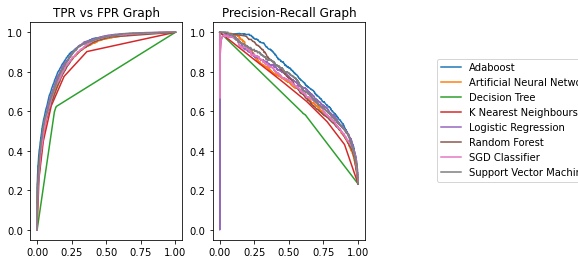

In [69]:
display(ovl_test_pred)
graph_test.legend(clf_labels,loc='center left', bbox_to_anchor=(1, 0.5))
graph_test

### 6.1.3 All algorithm after fine tune in train data

accuracy  precision  recall  f1_score  \
Support Vector Machine (fine_train)       0.8529     0.7740  0.5327    0.6311   
Logistic Regression (fine_train)          0.8511     0.7295  0.5869    0.6505   
Artificial Neural Network (fine_train)    0.8510     0.7402  0.5683    0.6430   
Random Forest (fine_train)                0.9722     0.9571  0.9237    0.9401   
SGD Classifier (fine_train)               0.8364     0.8101  0.4012    0.5367   
K Nearest Neighbour (fine_train)          0.8741     0.7642  0.6750    0.7168   
Adaboost (fine_train)                     0.9722     0.9493  0.9321    0.9406   
Decision tree (fine_train)                0.9172     0.8788  0.7530    0.8110   

                                        sensitivity  specificity  error_rate  \
Support Vector Machine (fine_train)          0.5327       0.9519      0.1471   
Logistic Regression (fine_train)             0.5869       0.9327      0.1489   
Artificial Neural Network (fine_train)       0.5683       0.9383      0.1490   
Random Forest (fine_train)                   0.9237       0.9872      0.0278   
SGD Classifier (fine_train)                  0.4012       0.9709      0.1636   
K Nearest Neighbour (fine_train)             0.6750       0.9356      0.1259   
Adaboost (fine_train)                        0.9321       0.9846      0.0278   
Decision tree (fine_train)                   0.7530       0.9679      0.0828   

                                        mean_cross_val_score  auc_score  \
Support Vector Machine (fine_train)                   0.8506     0.9019   
Logistic Regression (fine_train)                      0.8503     0.9016   
Artificial Neural Network (fine_train)                0.8494     0.9004   
Random Forest (fine_train)                            0.8488     0.8950   
SGD Classifier (fine_train)                           0.8369     0.8883   
K Nearest Neighbour (fine_train)                      0.8471     0.8868   
Adaboost (fine_train)                                 0.8345     0.8681   
Decision tree (fine_train)                            0.8360     0.8375   

                                        train time  pred time  
Support Vector Machine (fine_train)      1893.0217    49.1957  
Logistic Regression (fine_train)           51.3645     0.0060  
Artificial Neural Network (fine_train)   3128.9858     0.0294  
Random Forest (fine_train)                381.9646     1.2415  
SGD Classifier (fine_train)                96.9910     0.0060  
K Nearest Neighbour (fine_train)          167.4556    71.2494  
Adaboost (fine_train)                     203.6425     0.4780  
Decision tree (fine_train)                  2.5234     0.0155

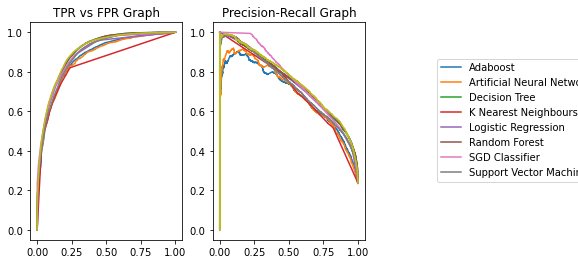

In [70]:
ovl_fine_tune_train = pd.concat([ovl_fine_sgd,ovl_fine_svc,ovl_fine_ann,ovl_fine_dtree,ovl_fine_ada,ovl_fine_log,ovl_fine_rforest,ovl_fine_knn], axis = 0)
ovl_fine_tune_train.sort_values(by = ['auc_score'], ascending = False, inplace = True)
display(ovl_fine_tune_train)
graph_fineTune.legend(clf_labels,loc='center left', bbox_to_anchor=(1, 0.5))
graph_fineTune

## 6.2 The Best Model's  Prediction On Test Set（From fine tune's best model - The predict result using test dataset)
**The final prediction**

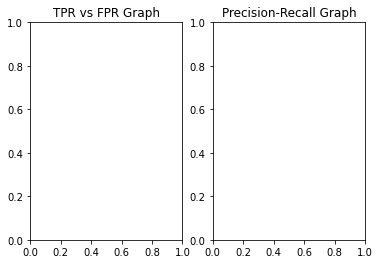

In [71]:
graph_fineTune_test, Ax = plt.subplots(1,2)
Ax[0].set_title('TPR vs FPR Graph')
Ax[1].set_title('Precision-Recall Graph')
models=[ada_best_model,ann_best_model,dtree_best_model,knn_best_model,log_best_model,rforest_best_model,sgd_best_model,svc_best_model]

Adaboost (fine_tune_test)


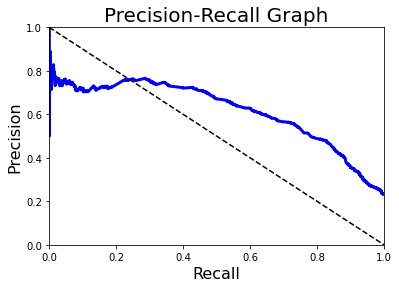

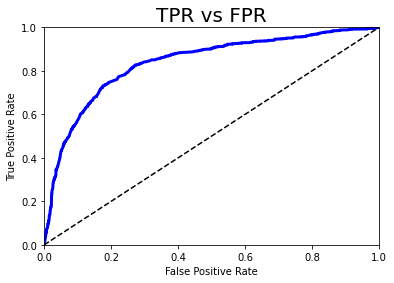

Artificial Neural Network (fine_tune_test)


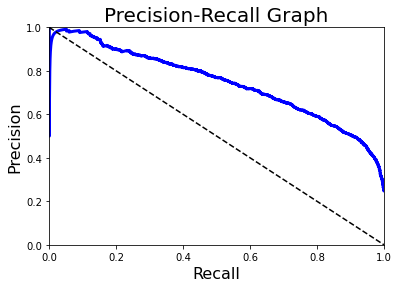

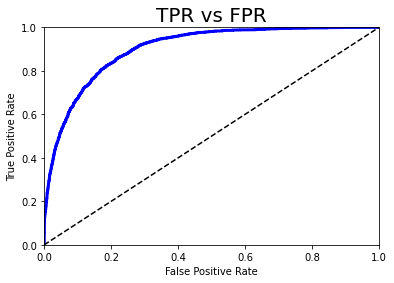

Decision Tree (fine_tune_test)


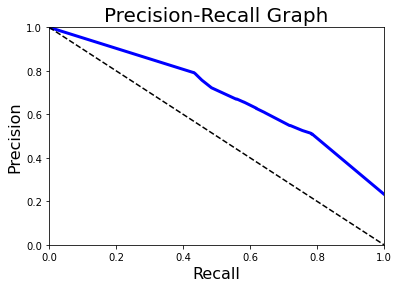

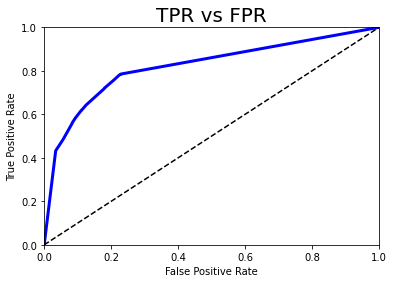

K Nearest Neighbours (fine_tune_test)


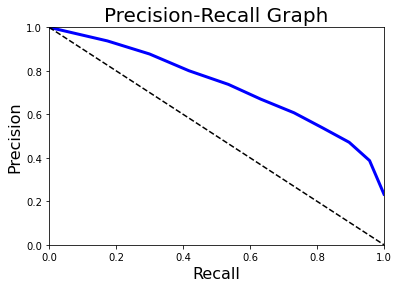

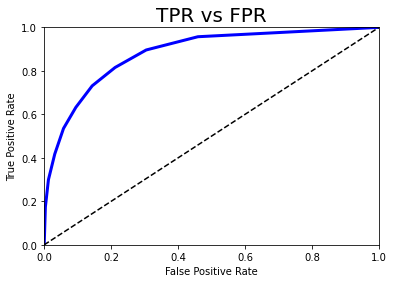

Logistic Regression (fine_tune_test)


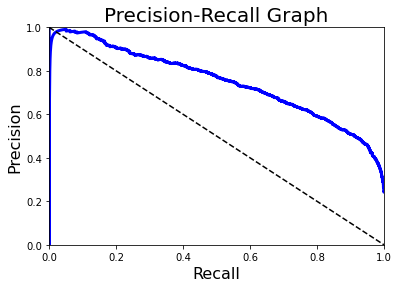

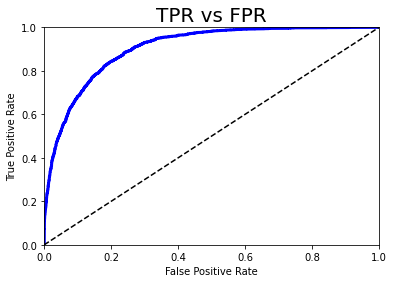

Random Forest (fine_tune_test)


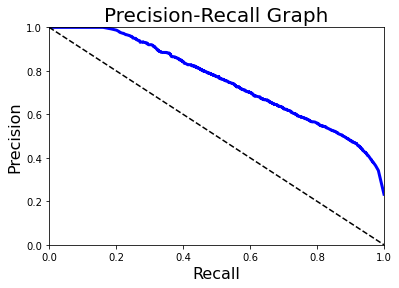

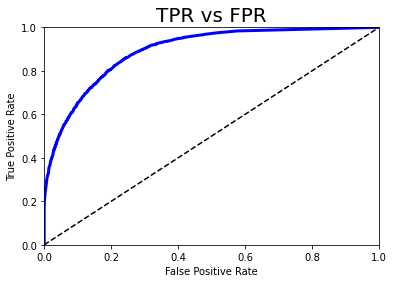

SGD Classifier (fine_tune_test)


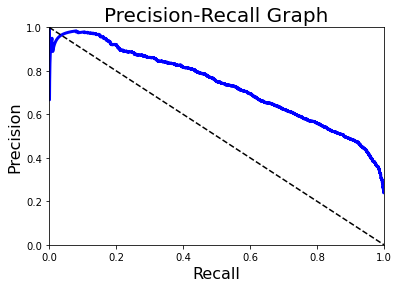

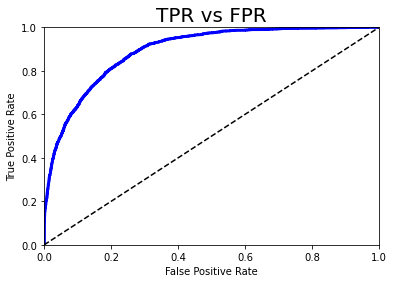

Support Vector Machine (fine_tune_test)


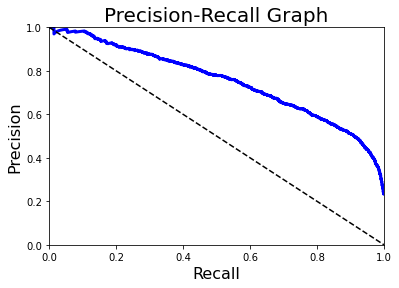

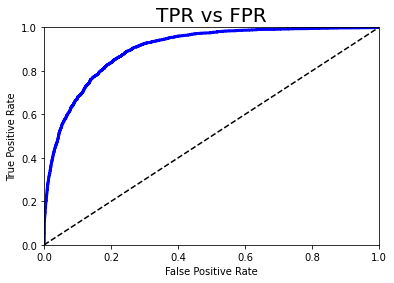

In [72]:
ovl_fine_tune_test=pd.DataFrame()

for model,label,met in zip(models,clf_labels_fine_tune_test,method):
    print(label)
    value_pred = model_eval(X_test, y_test,model,met,-1)
    ovl_pred = round(pd.DataFrame([value_pred], index = [label]),4)
    ovl_fine_tune_test=pd.concat([ovl_fine_tune_test,ovl_pred], axis = 0) 


accuracy  precision  recall  \
Logistic Regression (fine_tune_test)          0.8546     0.7247  0.6049   
Artificial Neural Network (fine_tune_test)    0.8537     0.7344  0.5813   
Support Vector Machine (fine_tune_test)       0.8554     0.7688  0.5409   
SGD Classifier (fine_tune_test)               0.8413     0.8150  0.4111   
Random Forest (fine_tune_test)                0.8569     0.7159  0.6382   
K Nearest Neighbours (fine_tune_test)         0.8522     0.6988  0.6404   
Adaboost (fine_tune_test)                     0.8450     0.6786  0.6342   
Decision Tree (fine_tune_test)                0.8452     0.6878  0.6129   

                                            f1_score  sensitivity  \
Logistic Regression (fine_tune_test)          0.6594       0.6049   
Artificial Neural Network (fine_tune_test)    0.6490       0.5813   
Support Vector Machine (fine_tune_test)       0.6350       0.5409   
SGD Classifier (fine_tune_test)               0.5465       0.4111   
Random Forest (fine_tune_test)                0.6748       0.6382   
K Nearest Neighbours (fine_tune_test)         0.6684       0.6404   
Adaboost (fine_tune_test)                     0.6556       0.6342   
Decision Tree (fine_tune_test)                0.6482       0.6129   

                                            specificity  error_rate  \
Logistic Regression (fine_tune_test)             0.9303      0.1454   
Artificial Neural Network (fine_tune_test)       0.9363      0.1463   
Support Vector Machine (fine_tune_test)          0.9507      0.1446   
SGD Classifier (fine_tune_test)                  0.9717      0.1587   
Random Forest (fine_tune_test)                   0.9232      0.1431   
K Nearest Neighbours (fine_tune_test)            0.9163      0.1478   
Adaboost (fine_tune_test)                        0.9089      0.1550   
Decision Tree (fine_tune_test)                   0.9157      0.1548   

                                            mean_cross_val_score  auc_score  \
Logistic Regression (fine_tune_test)                      0.8528     0.9047   
Artificial Neural Network (fine_tune_test)                0.8514     0.9022   
Support Vector Machine (fine_tune_test)                   0.8530     0.9020   
SGD Classifier (fine_tune_test)                           0.8346     0.8933   
Random Forest (fine_tune_test)                            0.8471     0.8930   
K Nearest Neighbours (fine_tune_test)                     0.8419     0.8812   
Adaboost (fine_tune_test)                                 0.8209     0.8374   
Decision Tree (fine_tune_test)                            0.8319     0.8193   

                                            train time  pred time  
Logistic Regression (fine_tune_test)                -1     0.0010  
Artificial Neural Network (fine_tune_test)          -1     0.0239  
Support Vector Machine (fine_tune_test)             -1    12.7355  
SGD Classifier (fine_tune_test)                     -1     0.0010  
Random Forest (fine_tune_test)                      -1     0.5286  
K Nearest Neighbours (fine_tune_test)               -1    16.5723  
Adaboost (fine_tune_test)                           -1     0.1322  
Decision Tree (fine_tune_test)                      -1     0.0050

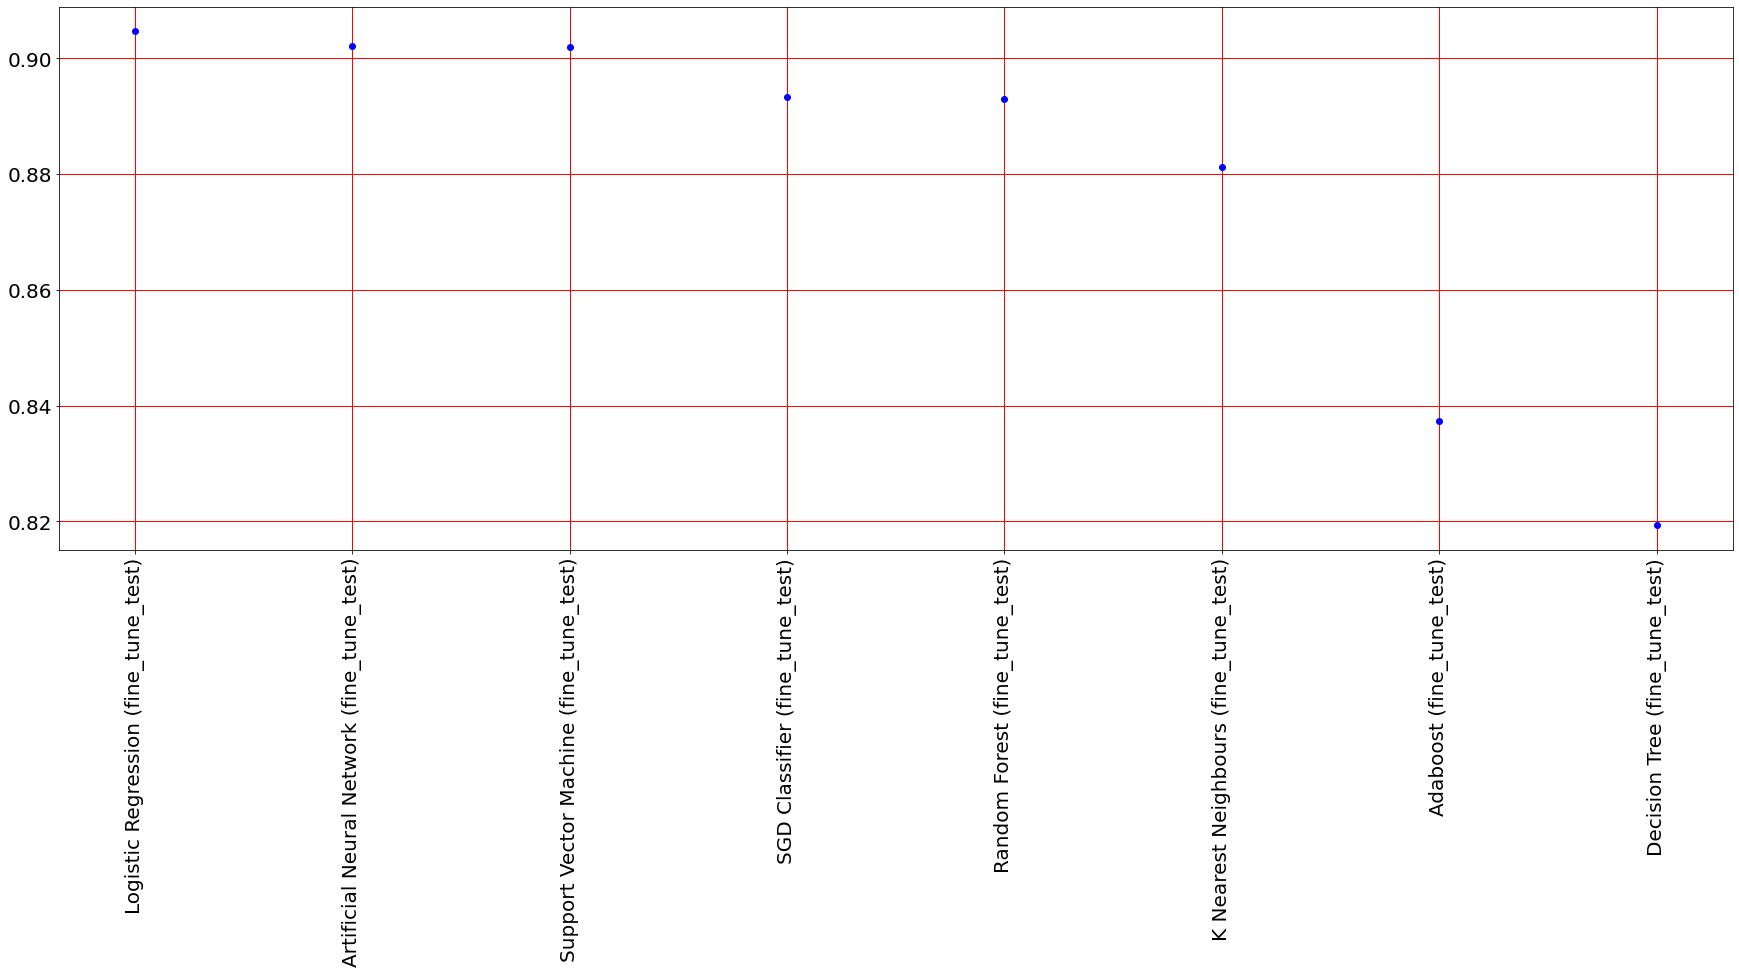

In [73]:
ovl_fine_tune_test.sort_values(by = ['auc_score'],ascending = False,  inplace = True)
display(ovl_fine_tune_test)
graph_fineTune_test.legend(clf_labels,loc='center left', bbox_to_anchor=(1, 0.5))
graph_fineTune_test

plt.figure(figsize=(30,10))
plt.xticks(rotation='vertical', fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=1)
plt.yticks(fontsize=20)
plt.plot(ovl_fine_tune_test.index.values, ovl_fine_tune_test.auc_score,'bo')
plt.show()

# 7.0 The conclusion

## 7.1 The Combination of all result (Just for have a overall look
**(Mixed of fine-tune and non-fine-tune on train and test dataset)**

### 7.1.1 Only Fine tune Result (Test data set and train data set)
* fine tune train - fine tune train dataset
* fine tune test - fine tune test dataset

In [74]:
overall_merge_pred = pd.concat([ovl_fine_tune_test,ovl_fine_tune_train], axis = 0)
overall_merge_pred.sort_values(by = ['auc_score'],ascending = False, inplace = True)
display(overall_merge_pred)

accuracy  precision  recall  \
Logistic Regression (fine_tune_test)          0.8546     0.7247  0.6049   
Artificial Neural Network (fine_tune_test)    0.8537     0.7344  0.5813   
Support Vector Machine (fine_tune_test)       0.8554     0.7688  0.5409   
Support Vector Machine (fine_train)           0.8529     0.7740  0.5327   
Logistic Regression (fine_train)              0.8511     0.7295  0.5869   
Artificial Neural Network (fine_train)        0.8510     0.7402  0.5683   
Random Forest (fine_train)                    0.9722     0.9571  0.9237   
SGD Classifier (fine_tune_test)               0.8413     0.8150  0.4111   
Random Forest (fine_tune_test)                0.8569     0.7159  0.6382   
SGD Classifier (fine_train)                   0.8364     0.8101  0.4012   
K Nearest Neighbour (fine_train)              0.8741     0.7642  0.6750   
K Nearest Neighbours (fine_tune_test)         0.8522     0.6988  0.6404   
Adaboost (fine_train)                         0.9722     0.9493  0.9321   
Decision tree (fine_train)                    0.9172     0.8788  0.7530   
Adaboost (fine_tune_test)                     0.8450     0.6786  0.6342   
Decision Tree (fine_tune_test)                0.8452     0.6878  0.6129   

                                            f1_score  sensitivity  \
Logistic Regression (fine_tune_test)          0.6594       0.6049   
Artificial Neural Network (fine_tune_test)    0.6490       0.5813   
Support Vector Machine (fine_tune_test)       0.6350       0.5409   
Support Vector Machine (fine_train)           0.6311       0.5327   
Logistic Regression (fine_train)              0.6505       0.5869   
Artificial Neural Network (fine_train)        0.6430       0.5683   
Random Forest (fine_train)                    0.9401       0.9237   
SGD Classifier (fine_tune_test)               0.5465       0.4111   
Random Forest (fine_tune_test)                0.6748       0.6382   
SGD Classifier (fine_train)                   0.5367       0.4012   
K Nearest Neighbour (fine_train)              0.7168       0.6750   
K Nearest Neighbours (fine_tune_test)         0.6684       0.6404   
Adaboost (fine_train)                         0.9406       0.9321   
Decision tree (fine_train)                    0.8110       0.7530   
Adaboost (fine_tune_test)                     0.6556       0.6342   
Decision Tree (fine_tune_test)                0.6482       0.6129   

                                            specificity  error_rate  \
Logistic Regression (fine_tune_test)             0.9303      0.1454   
Artificial Neural Network (fine_tune_test)       0.9363      0.1463   
Support Vector Machine (fine_tune_test)          0.9507      0.1446   
Support Vector Machine (fine_train)              0.9519      0.1471   
Logistic Regression (fine_train)                 0.9327      0.1489   
Artificial Neural Network (fine_train)           0.9383      0.1490   
Random Forest (fine_train)                       0.9872      0.0278   
SGD Classifier (fine_tune_test)                  0.9717      0.1587   
Random Forest (fine_tune_test)                   0.9232      0.1431   
SGD Classifier (fine_train)                      0.9709      0.1636   
K Nearest Neighbour (fine_train)                 0.9356      0.1259   
K Nearest Neighbours (fine_tune_test)            0.9163      0.1478   
Adaboost (fine_train)                            0.9846      0.0278   
Decision tree (fine_train)                       0.9679      0.0828   
Adaboost (fine_tune_test)                        0.9089      0.1550   
Decision Tree (fine_tune_test)                   0.9157      0.1548   

                                            mean_cross_val_score  auc_score  \
Logistic Regression (fine_tune_test)                      0.8528     0.9047   
Artificial Neural Network (fine_tune_test)                0.8514     0.9022   
Support Vector Machine (fine_tune_test)                   0.8530     0.9020   
Support Vector Machine (fine_train)                       0.8506     0

### 7.1.2 Mixed of All result
* test - non fine tune dataset
* train - non fine tune train dataset
* fine tune train - fine tune train dataset
* fine tune test - fine tune test dataset

**AUC score sorting**

In [75]:
overall_merge_pred = pd.concat([ovl_fine_tune_test,ovl_fine_tune_train,ovl_test_pred,ovl_train_pred], axis = 0)
overall_merge_pred.sort_values(by = ['auc_score'],ascending = False, inplace = True)
display(overall_merge_pred)

accuracy  precision  recall  \
Adaboost (test)                               0.8626     0.7491  0.6156   
Adaboost (train)                              0.8595     0.7543  0.6004   
Logistic Regression (fine_tune_test)          0.8546     0.7247  0.6049   
Logistic Regression (test)                    0.8543     0.7240  0.6040   
Artificial Neural Network (fine_tune_test)    0.8537     0.7344  0.5813   
Support Vector Machine (fine_tune_test)       0.8554     0.7688  0.5409   
Support Vector Machine (test)                 0.8548     0.7527  0.5600   
Support Vector Machine (fine_train)           0.8529     0.7740  0.5327   
Logistic Regression (train)                   0.8510     0.7293  0.5866   
Logistic Regression (fine_train)              0.8511     0.7295  0.5869   
Support Vector Machine (train)                0.8528     0.7575  0.5540   
Artificial Neural Network (fine_train)        0.8510     0.7402  0.5683   
SGD Classifier (train)                        0.8499     0.7553  0.5386   
Random Forest (fine_train)                    0.9722     0.9571  0.9237   
SGD Classifier (test)                         0.8532     0.7503  0.5529   
SGD Classifier (fine_tune_test)               0.8413     0.8150  0.4111   
Random Forest (fine_tune_test)                0.8569     0.7159  0.6382   
Random Forest (train)                         0.9722     0.9576  0.9229   
Artificial Neural Network (train)             0.8872     0.7856  0.7184   
Random Forest (test)                          0.8555     0.7113  0.6373   
Artificial Neural Network (test)              0.8537     0.6987  0.6524   
SGD Classifier (fine_train)                   0.8364     0.8101  0.4012   
K Nearest Neighbour (fine_train)              0.8741     0.7642  0.6750   
K Nearest Neighbours (fine_tune_test)         0.8522     0.6988  0.6404   
Adaboost (fine_train)                         0.9722     0.9493  0.9321   
K Nearest Neighbours (train)                  0.8841     0.7812  0.7070   
K Nearest Neighbours (test)                   0.8449     0.6749  0.6431   
Decision tree (fine_train)                    0.9172     0.8788  0.7530   
Adaboost (fine_tune_test)                     0.8450     0.6786  0.6342   
Decision Tree (fine_tune_test)                0.8452     0.6878  0.6129   
Decision Tree (train)                         0.9722     0.9803  0.9004   
Decision Tree (test)                          0.8286     0.6359  0.6156   

                                            f1_score  sensitivity  \
Adaboost (test)                               0.6758       0.6156   
Adaboost (train)                              0.6686       0.6004   
Logistic Regression (fine_tune_test)          0.6594       0.6049   
Logistic Regression (test)                    0.6586       0.6040   
Artificial Neural Network (fine_tune_test)    0.6490       0.5813   
Support Vector Machine (fine_tune_test)       0.6350       0.5409   
Support Vector Machine (test)                 0.6422       0.5600   
Support Vector Machine (fine_train)           0.6311       0.5327   
Logistic Regression (train)                   0.6502       0.5866   
Logistic Regression (fine_train)              0.6505       0.5869   
Support Vector Machine (train)                0.6399       0.5540   
Artificial Neural Network (fine_train)        0.6430       0.5683   
SGD Classifier (train)                        0.6288       0.5386   
Random Forest (fine_train)                    0.9401       0.9237   
SGD Classifier (test)                         0.6366       0.5529   
SGD Classifier (fine_tune_test)               0.5465       0.4111   
Random Forest (fine_tune_test)                0.6748       0.6382   
Random Forest (train)                         0.9400       0.9229   
Artificial Neural Network (train)             0.7505       0.7184   
Random Forest (test)                          0.6723       0.6373   
Artificial Neural Network (test)              0.6748       0.6524   
SGD Classifier (fine_train)                   0.53

**Aphabatical order sorting**

In [76]:
overall_merge_pred.sort_index(inplace=True)
display(overall_merge_pred)

accuracy  precision  recall  \
Adaboost (fine_train)                         0.9722     0.9493  0.9321   
Adaboost (fine_tune_test)                     0.8450     0.6786  0.6342   
Adaboost (test)                               0.8626     0.7491  0.6156   
Adaboost (train)                              0.8595     0.7543  0.6004   
Artificial Neural Network (fine_train)        0.8510     0.7402  0.5683   
Artificial Neural Network (fine_tune_test)    0.8537     0.7344  0.5813   
Artificial Neural Network (test)              0.8537     0.6987  0.6524   
Artificial Neural Network (train)             0.8872     0.7856  0.7184   
Decision Tree (fine_tune_test)                0.8452     0.6878  0.6129   
Decision Tree (test)                          0.8286     0.6359  0.6156   
Decision Tree (train)                         0.9722     0.9803  0.9004   
Decision tree (fine_train)                    0.9172     0.8788  0.7530   
K Nearest Neighbour (fine_train)              0.8741     0.7642  0.6750   
K Nearest Neighbours (fine_tune_test)         0.8522     0.6988  0.6404   
K Nearest Neighbours (test)                   0.8449     0.6749  0.6431   
K Nearest Neighbours (train)                  0.8841     0.7812  0.7070   
Logistic Regression (fine_train)              0.8511     0.7295  0.5869   
Logistic Regression (fine_tune_test)          0.8546     0.7247  0.6049   
Logistic Regression (test)                    0.8543     0.7240  0.6040   
Logistic Regression (train)                   0.8510     0.7293  0.5866   
Random Forest (fine_train)                    0.9722     0.9571  0.9237   
Random Forest (fine_tune_test)                0.8569     0.7159  0.6382   
Random Forest (test)                          0.8555     0.7113  0.6373   
Random Forest (train)                         0.9722     0.9576  0.9229   
SGD Classifier (fine_train)                   0.8364     0.8101  0.4012   
SGD Classifier (fine_tune_test)               0.8413     0.8150  0.4111   
SGD Classifier (test)                         0.8532     0.7503  0.5529   
SGD Classifier (train)                        0.8499     0.7553  0.5386   
Support Vector Machine (fine_train)           0.8529     0.7740  0.5327   
Support Vector Machine (fine_tune_test)       0.8554     0.7688  0.5409   
Support Vector Machine (test)                 0.8548     0.7527  0.5600   
Support Vector Machine (train)                0.8528     0.7575  0.5540   

                                            f1_score  sensitivity  \
Adaboost (fine_train)                         0.9406       0.9321   
Adaboost (fine_tune_test)                     0.6556       0.6342   
Adaboost (test)                               0.6758       0.6156   
Adaboost (train)                              0.6686       0.6004   
Artificial Neural Network (fine_train)        0.6430       0.5683   
Artificial Neural Network (fine_tune_test)    0.6490       0.5813   
Artificial Neural Network (test)              0.6748       0.6524   
Artificial Neural Network (train)             0.7505       0.7184   
Decision Tree (fine_tune_test)                0.6482       0.6129   
Decision Tree (test)                          0.6256       0.6156   
Decision Tree (train)                         0.9387       0.9004   
Decision tree (fine_train)                    0.8110       0.7530   
K Nearest Neighbour (fine_train)              0.7168       0.6750   
K Nearest Neighbours (fine_tune_test)         0.6684       0.6404   
K Nearest Neighbours (test)                   0.6586       0.6431   
K Nearest Neighbours (train)                  0.7423       0.7070   
Logistic Regression (fine_train)              0.6505       0.5869   
Logistic Regression (fine_tune_test)          0.6594       0.6049   
Logistic Regression (test)                    0.6586       0.6040   
Logistic Regression (train)                   0.6502       0.5866   
Random Forest (fine_train)                    0.9401       0.9237   
Random Forest (fine_tune_test)                0.67

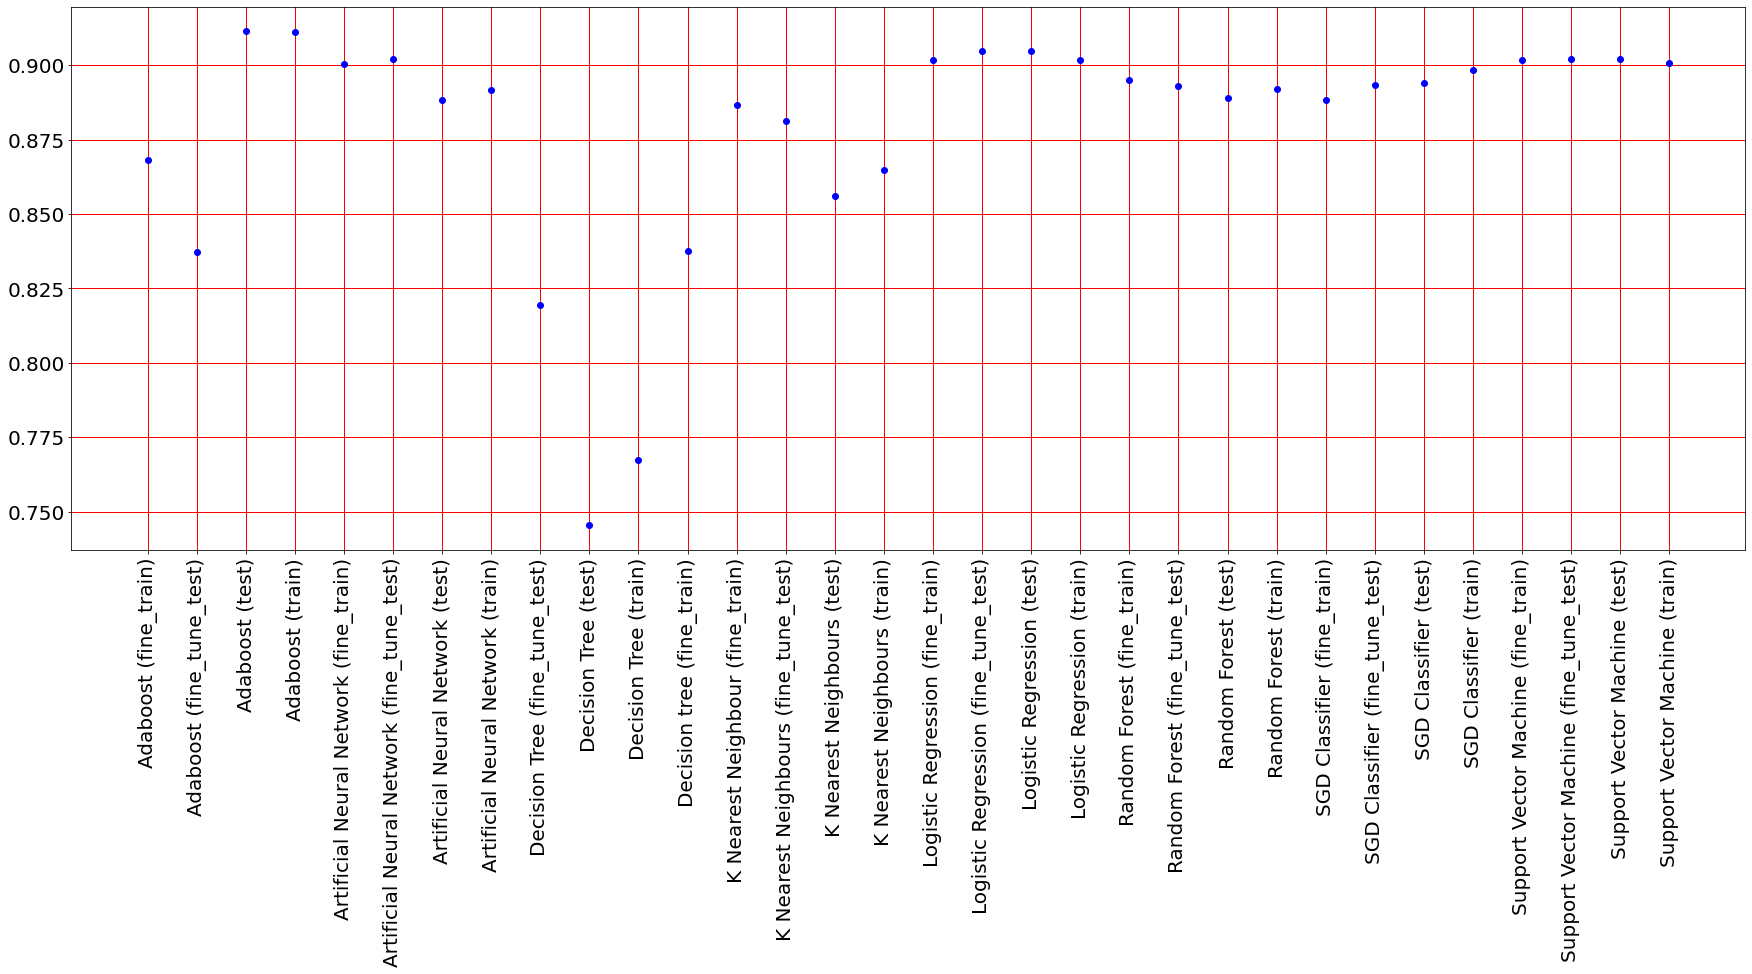

In [77]:
plt.figure(figsize=(30,10))
plt.xticks(rotation='vertical', fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=1)
plt.yticks(fontsize=20)
plt.plot(overall_merge_pred.index.values, overall_merge_pred.auc_score,'bo')
plt.show()

# ***`Hence, Random Forest is the best algorithm, it has excellent auc_score and high recall score.`***

<hr>
<h1><strong><center>UCCD2063 Artificial Intelligence Techniques</center> </strong></h1>

<h1><center>Classification of Adult Income by Machine Learning</center></h1>
<hr>
<h2><strong><center>The contributors:</center></strong></h2>
<h3>
<center>Tan Jing Jie 1804560</center>
<center>Lew Wei Li 1803518</center>
<center>Pamela Yong Zi Wei 1803580</center>
</h3>
<hr>

<h1><strong>End</strong></h1>
